<a href="https://colab.research.google.com/github/merdogan97/Machine-Learning-ML-/blob/main/ML_Assignment_3(Tree_Types_Prediction_Classification)_20_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# **Determines**

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# **Tasks**

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

# **1. Exploratory Data Analysis**

### Import Libraries, Load Dataset, Exploring Data

# **i. Import Libraries**

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **ii. Load Dataset**

In [ ]:
df= pd.read_csv("treetypes.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,3269,110,19,134,40,3734,249,216,88,3960,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3283,322,18,346,104,4369,170,217,185,1330,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
3,2847,89,31,270,175,1320,248,173,29,889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,3248,93,12,507,118,570,239,221,110,945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


# **iii. Explore Data**
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40349 entries, 0 to 40348
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           40349 non-null  int64  
 1   Aspect                              40349 non-null  int64  
 2   Slope                               40349 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    40349 non-null  int64  
 4   Vertical_Distance_To_Hydrology      40349 non-null  int64  
 5   Horizontal_Distance_To_Roadways     40349 non-null  int64  
 6   Hillshade_9am                       40349 non-null  int64  
 7   Hillshade_Noon                      40349 non-null  int64  
 8   Hillshade_3pm                       40349 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  40349 non-null  int64  
 10  Wilderness_Area_1                   40349 non-null  int64  
 11  Wilderness_Area_2                   40349

***
***

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,40349.000000,40349.000000,40349.000000,40349.000000,40349.000000,40349.000000,40349.000000,40349.000000,40349.000000,40349.000000,...,40348.000000,40348.000000,40348.000000,40348.000000,40348.000000,40348.000000,40348.000000,40348.000000,40348.000000,40348.000000
mean,2749.601254,156.651392,16.317282,225.954943,50.278669,1723.785992,212.358596,218.558254,134.583484,1525.956604,...,0.042431,0.040027,0.001413,0.006097,0.000173,0.002057,0.047289,0.040299,0.026817,4.002751
std,418.443934,109.669720,8.333098,208.096690,60.479652,1335.922733,30.683665,22.746807,46.025834,1106.203455,...,0.201573,0.196024,0.037560,0.077846,0.013171,0.045309,0.212258,0.196663,0.161549,1.998405
min,1859.000000,0.000000,0.000000,0.000000,-153.000000,0.000000,30.000000,74.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,66.000000,10.000000,65.000000,5.000000,755.000000,195.000000,207.000000,106.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2756.000000,125.000000,15.000000,177.000000,31.000000,1318.000000,220.000000,222.000000,138.000000,1281.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3108.000000,260.000000,22.000000,326.000000,79.000000,2305.000000,235.000000,235.000000,167.000000,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3851.000000,360.000000,56.000000,1347.000000,565.000000,7033.000000,254.000000,254.000000,248.000000,7141.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Elevation has 1831 unique values
Column Aspect has 361 unique values
Column Slope has 52 unique values
Column Horizontal_Distance_To_Hydrology has 1153 unique values
Column Vertical_Distance_To_Hydrology has 496 unique values
Column Horizontal_Distance_To_Roadways has 5515 unique values
Column Hillshade_9am has 189 unique values
Column Hillshade_Noon has 150 unique values
Column Hillshade_3pm has 249 unique values
Column Horizontal_Distance_To_Fire_Points has 4895 unique values
Column Wilderness_Area_1 has 2 unique values
Column Wilderness_Area_2 has 2 unique values
Column Wilderness_Area_3 has 2 unique values
Column Wilderness_Area_4 has 2 unique values
Column Soil_Type_1 has 2 unique values
Column Soil_Type_2 has 2 unique values
Column Soil_Type_3 has 2 unique values
Column Soil_Type_4 has 2 unique values
Column Soil_Type_5 has 2 unique values
Column Soil_Type_6 has 2 unique values
Column Soil_Type_7 has 2 unique values
Column Soil_Type_8 has 2 unique values
Column Soil_Type_9

In [ ]:
dummy_cols=['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5',
       'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38',
       'Soil_Type_39', 'Soil_Type_40']

In [ ]:
df=reversed_dummies(df,dummy_cols,'Soil')

In [ ]:
dummy_cols=['Wilderness_Area_1','Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
df=reversed_dummies(df,dummy_cols,'Wilderness')

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil,Wilderness
0,2696,123,10,212,48,2245,237,231,123,2113,6.0,10,3
1,3269,110,19,134,40,3734,249,216,88,3960,1.0,38,1
2,3283,322,18,346,104,4369,170,217,185,1330,7.0,38,1
3,2847,89,31,270,175,1320,248,173,29,889,5.0,13,3
4,3248,93,12,507,118,570,239,221,110,945,7.0,31,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40349 entries, 0 to 40348
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           40349 non-null  int64  
 1   Aspect                              40349 non-null  int64  
 2   Slope                               40349 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    40349 non-null  int64  
 4   Vertical_Distance_To_Hydrology      40349 non-null  int64  
 5   Horizontal_Distance_To_Roadways     40349 non-null  int64  
 6   Hillshade_9am                       40349 non-null  int64  
 7   Hillshade_Noon                      40349 non-null  int64  
 8   Hillshade_3pm                       40349 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  40349 non-null  int64  
 10  Cover_Type                          40348 non-null  float64
 11  Soil                                40349

In [ ]:
# categorik verilerin istatistiksel analizi icin:
df.describe(include=['O'])

,Soil,Wilderness
count,40349,40349
unique,39,4
top,10,3
freq,5116,16908


In [ ]:
df.apply(lambda x: x.nunique())

Elevation                             1831
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology      1153
Vertical_Distance_To_Hydrology         496
Horizontal_Distance_To_Roadways       5515
Hillshade_9am                          189
Hillshade_Noon                         150
Hillshade_3pm                          249
Horizontal_Distance_To_Fire_Points    4895
Cover_Type                               7
Soil                                    39
Wilderness                               4
dtype: int64

In [ ]:
# Target Label

df.Cover_Type.unique() 

array([ 6.,  1.,  7.,  5.,  2.,  3.,  4., nan])

In [ ]:
df.Cover_Type.value_counts()

5.0    5910
2.0    5843
3.0    5793
7.0    5782
6.0    5702
1.0    5690
4.0    5628
Name: Cover_Type, dtype: int64

In [ ]:
df.Cover_Type.isnull().sum()

1

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40348 entries, 0 to 40347
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           40348 non-null  int64  
 1   Aspect                              40348 non-null  int64  
 2   Slope                               40348 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    40348 non-null  int64  
 4   Vertical_Distance_To_Hydrology      40348 non-null  int64  
 5   Horizontal_Distance_To_Roadways     40348 non-null  int64  
 6   Hillshade_9am                       40348 non-null  int64  
 7   Hillshade_Noon                      40348 non-null  int64  
 8   Hillshade_3pm                       40348 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  40348 non-null  int64  
 10  Cover_Type                          40348 non-null  float64
 11  Soil                                40348

In [ ]:
df.isnull().sum()*100/df.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Cover_Type                            0.0
Soil                                  0.0
Wilderness                            0.0
dtype: float64

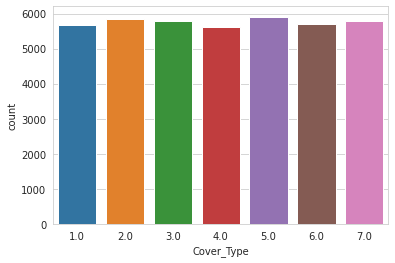

In [ ]:
# df.Cover_Type.value_counts(dropna=False).sort_index()
sns.countplot(x='Cover_Type',data=df);

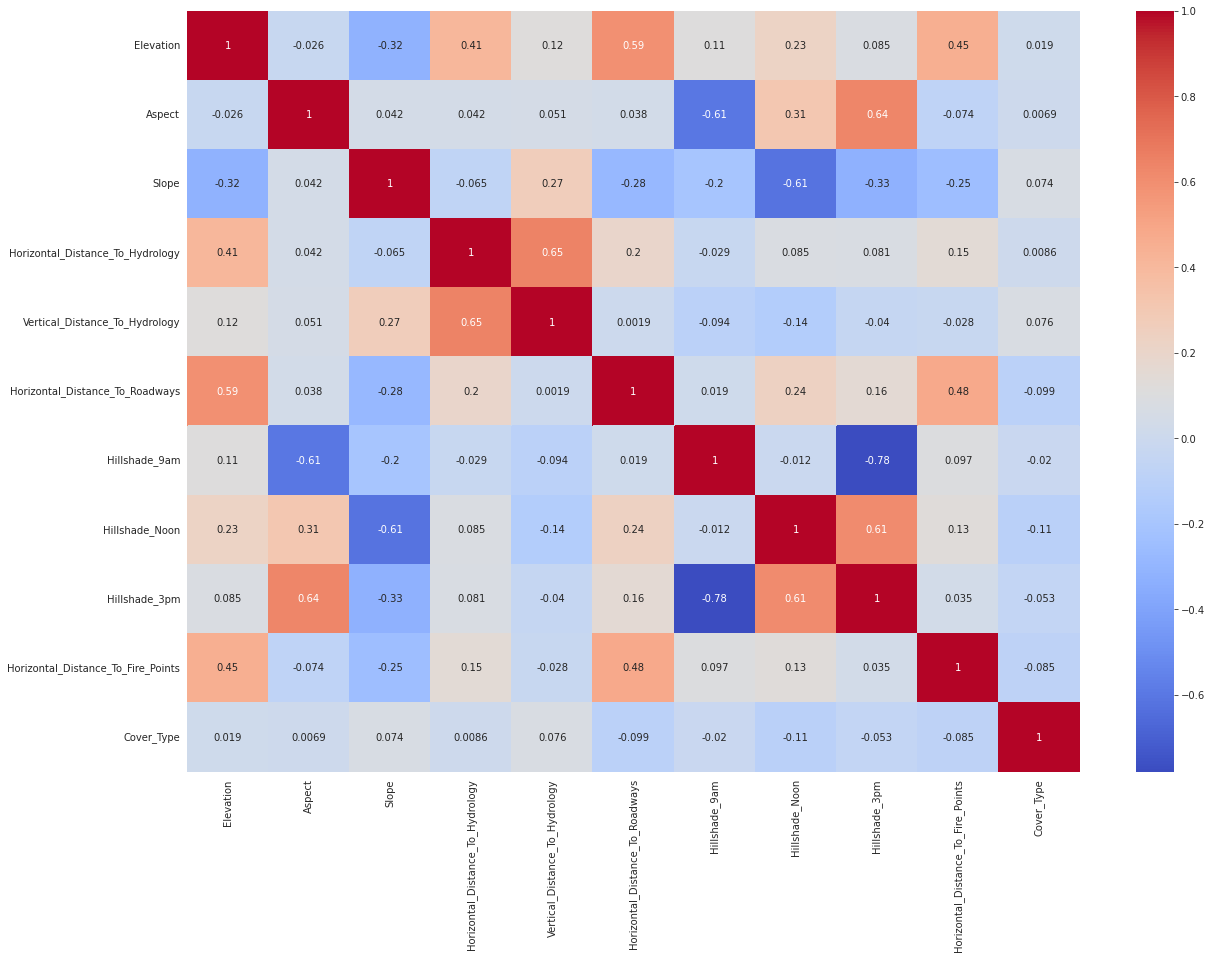

In [ ]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

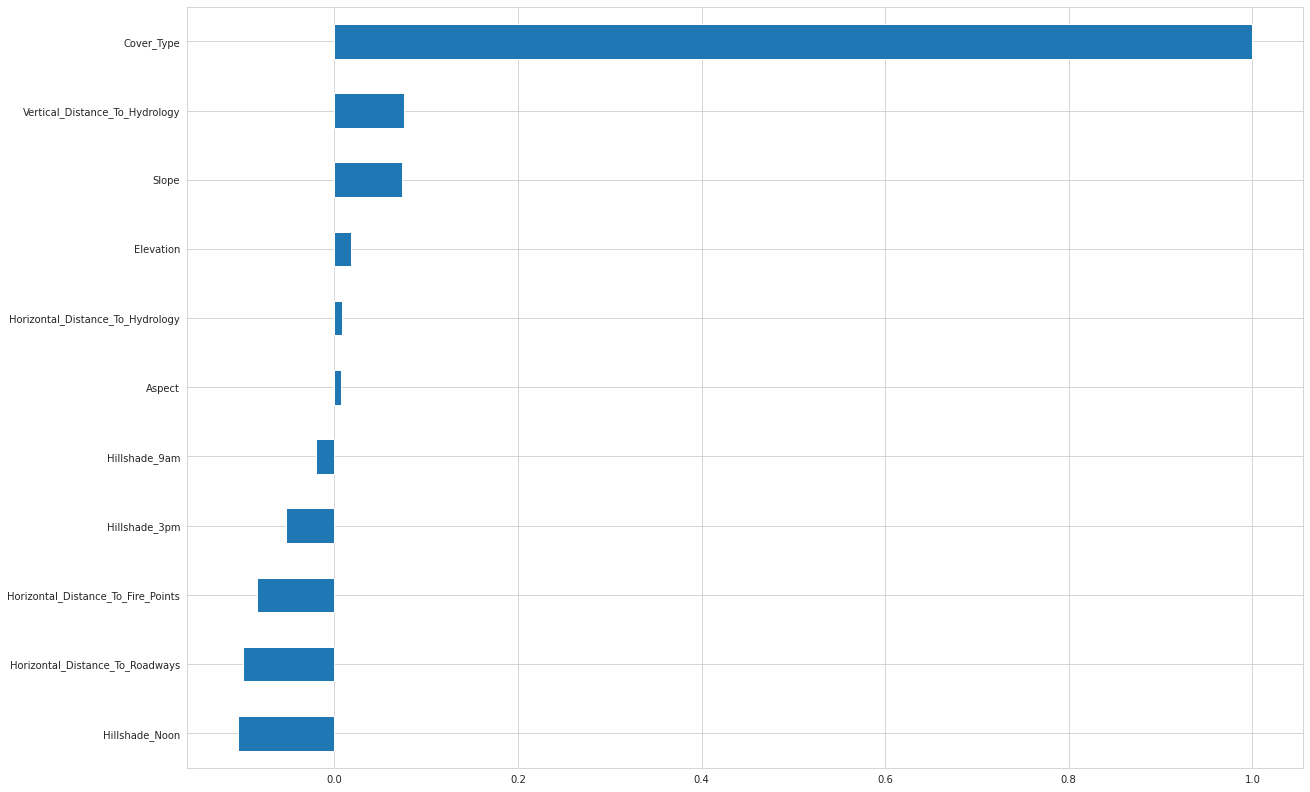

In [ ]:
plt.figure(figsize=(20,14))
df.corr()["Cover_Type"].sort_values().plot.barh();

# **Relationships and Correlations Between Features**

# **Wilderness - Soil**

In [ ]:
df.groupby(['Wilderness']).Soil.describe(include=['O'])

,count,unique,top,freq
Wilderness,,,,
1,9657,22,29,3451
2,1382,17,40,341
3,16908,29,32,1609
4,12401,11,10,3611


# **Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology**

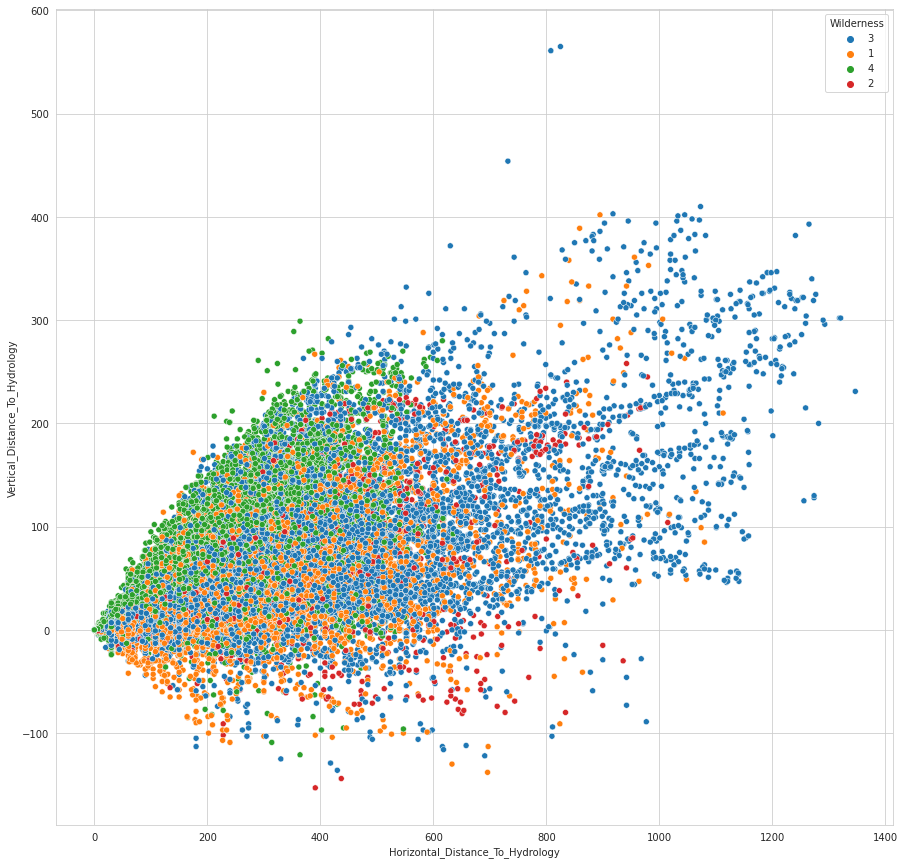

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=df, hue='Wilderness');

# **Soil - Cover_Type**

In [ ]:
df.Soil.value_counts(dropna=False)

10    5116
1     4491
29    3452
3     2290
23    1912
38    1908
30    1875
4     1847
32    1712
39    1626
33    1615
6     1503
2     1488
13    1321
17    1248
40    1082
11     946
22     886
31     779
12     619
24     614
5      368
20     330
35     246
14     237
16     166
26     156
18     139
19     105
37      83
34      57
28      30
21      30
27      26
9       22
25       9
36       7
7        4
8        3
Name: Soil, dtype: int64

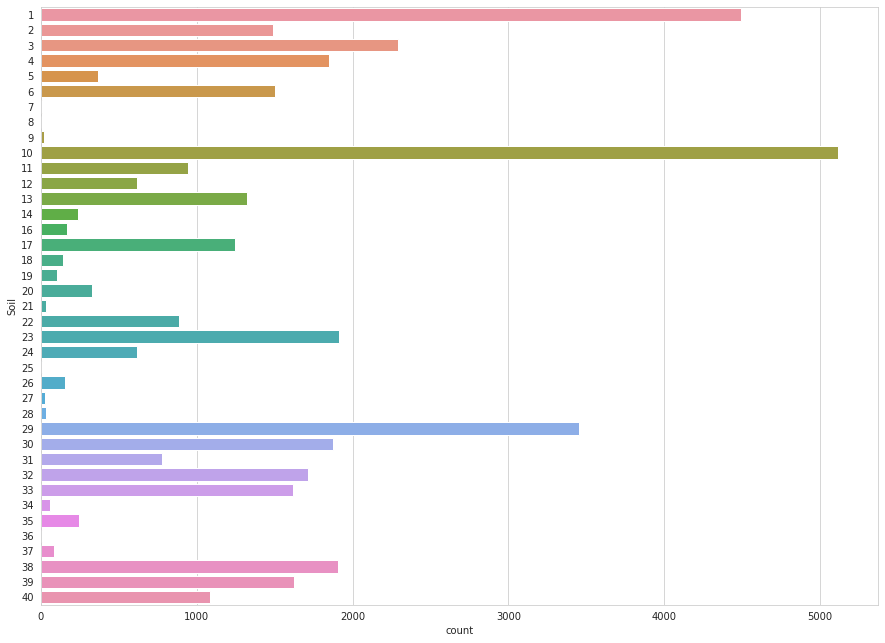

In [ ]:
plt.figure(figsize=(15,11))
sns.countplot(y='Soil',data=df.sort_values(by=['Soil'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')));

# **Wilderness - Cover_Type**

In [ ]:
df.Wilderness.value_counts(dropna=False)

3    16908
4    12401
1     9657
2     1382
Name: Wilderness, dtype: int64

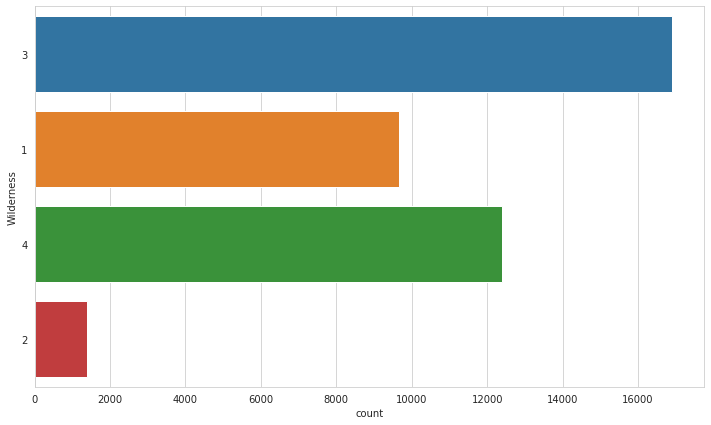

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(y='Wilderness',data=df);

# **Elevation - Cover_Type**

In [ ]:
df[["Elevation", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Elevation
0,1.0,3129.868014
1,2.0,2924.588910
2,3.0,2388.067668
3,4.0,2223.506219
4,5.0,2784.818951
5,6.0,2419.791301
6,7.0,3362.193013


<Figure size 864x504 with 0 Axes>

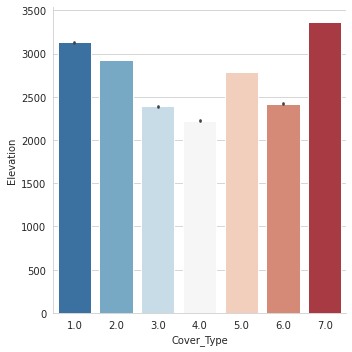

In [ ]:
plt.figure(figsize=(12,7))
sns.factorplot(x="Cover_Type", y ="Elevation", data=df, kind="bar", palette='RdBu_r',size=5);

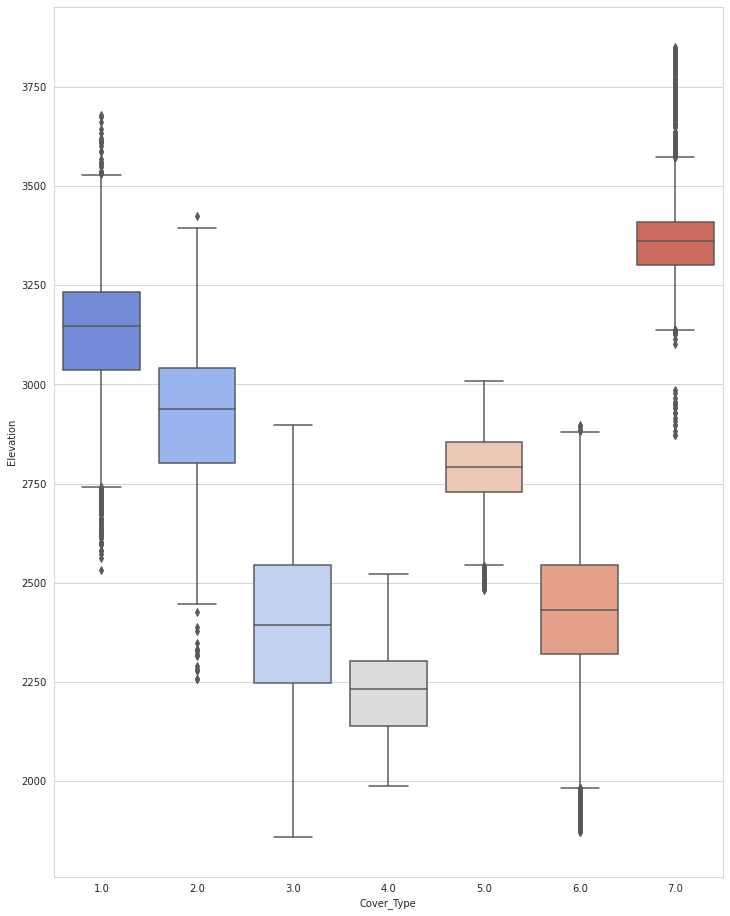

In [ ]:
plt.figure(figsize=(12,16))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm");

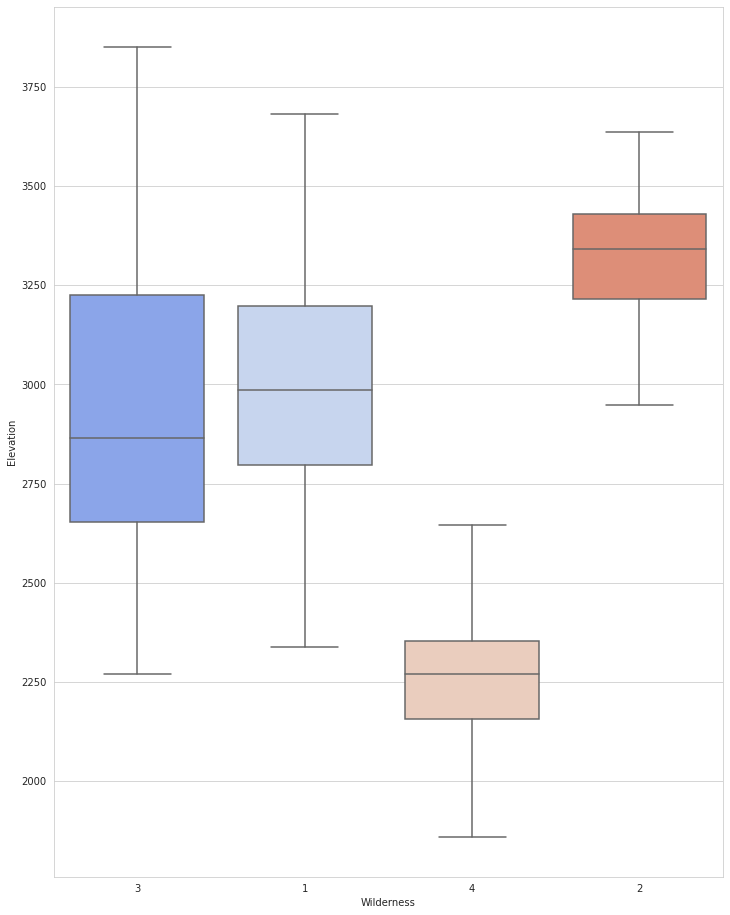

In [ ]:
plt.figure(figsize=(12,16))
sns.boxplot(x='Wilderness', y='Elevation', data=df, palette="coolwarm");

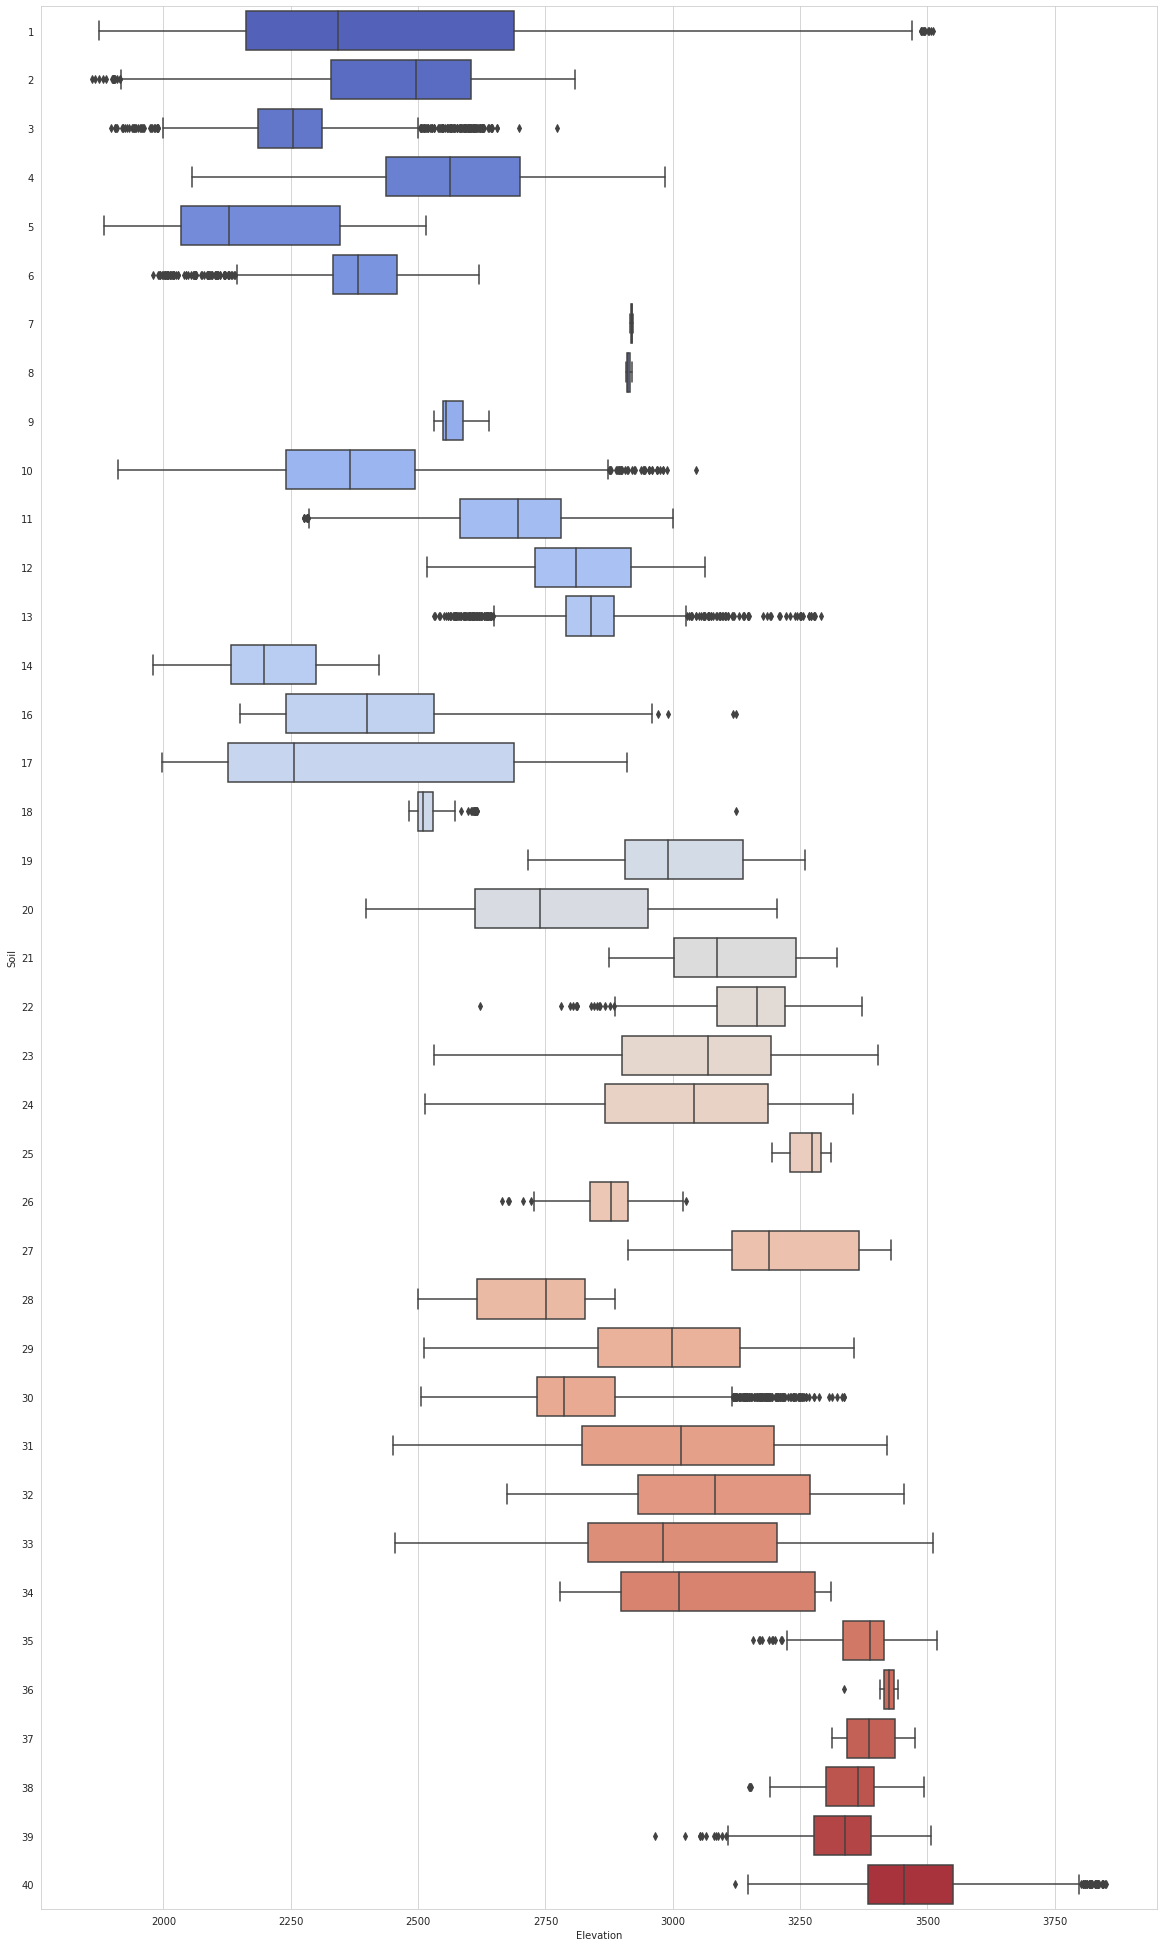

In [ ]:
plt.figure(figsize=(20,35))
sns.boxplot(y='Soil', x='Elevation', data=df.sort_values(by=['Soil'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')), orient="h",palette="coolwarm");

<Figure size 1080x1080 with 0 Axes>

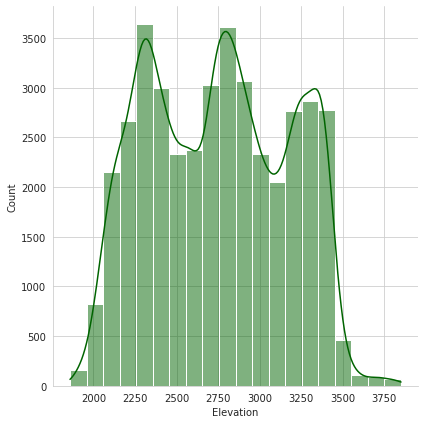

In [ ]:
plt.figure(figsize=(15,15))
sns.displot(df['Elevation'].dropna(), kde=True, height= 6, color='darkgreen', bins=20);

# **Slope - Cover_Type**

In [ ]:
df[["Slope", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Slope
0,1.0,12.992619
1,2.0,13.632894
2,3.0,20.535992
3,4.0,18.219083
4,5.0,16.208799
5,6.0,18.733251
6,7.0,13.951228


In [ ]:
df.groupby(['Cover_Type', 'Wilderness']).Slope.describe()

count       mean       std  min    25%   50%    75%  \
Cover_Type Wilderness                                                         
1.0        1           2841.0  12.300598  7.047557  0.0   7.00  11.0  16.00   
           2            540.0  13.042593  6.700320  0.0   8.00  12.0  17.00   
           3           2309.0  13.832395  6.616904  0.0   9.00  13.0  18.00   
2.0        1           2989.0  11.662094  6.214665  0.0   7.00  11.0  15.00   
           2            205.0  12.926829  6.174704  1.0   8.00  13.0  18.00   
           3           2584.0  15.912539  7.522691  0.0  10.00  15.0  20.25   
           4             65.0  15.861538  7.176082  3.0  10.00  17.0  21.00   
3.0        1             17.0  13.000000  5.511352  2.0  11.00  12.0  15.00   
           3           2216.0  17.320397  8.125609  0.0  11.00  16.0  23.00   
           4           3560.0  22.573596  8.599658  1.0  16.00  23.0  29.00   
4.0        4           5628.0  18.219083  8.910758  1.0  11.00  18.0  25.00   
5.0        1           2333.0  19.393913  8.438939  1.0  13.00  20.0  25.00   
           3           3577.0  14.131395  7.090976  1.0   9.00  13.0  19.00   
6.0        1             24.0  11.791667  4.643641  5.0   8.75  11.5  14.00   
           3           2530.0  16.822530  7.517827  0.0  11.00  17.0  23.00   
           4           3148.0  20.321792  7.458028  1.0  15.00  20.0  26.00   
7.0        1           1453.0  13.465933  7.461267  1.0   8.00  12.0  18.00   
           2            637.0  13.737834  7.363562  1.0   8.00  13.0  18.00   
           3           3692.0  14.179036  7.490636  1.0   9.00  13.0  17.00   

                        max  
Cover_Type Wilderness        
1.0        1           56.0  
           2           41.0  
           3           46.0  
2.0        1           42.0  
           2           29.0  
           3           49.0  
           4           30.0  
3.0        1           25.0  
           3           49.0  
           4           47.0  
4.0        4           45.0  
5.0        1           49.0  
           3           40.0  
6.0        1           24.0  
           3           49.0  
           4           41.0  
7.0        1           43.0  
           2           41.0  
           3           50.0

<Figure size 1080x1080 with 0 Axes>

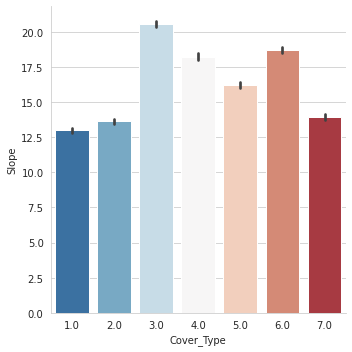

In [ ]:
plt.figure(figsize=(15,15))
sns.factorplot(x="Cover_Type", y ="Slope", data=df, kind="bar", palette='RdBu_r',size=5);

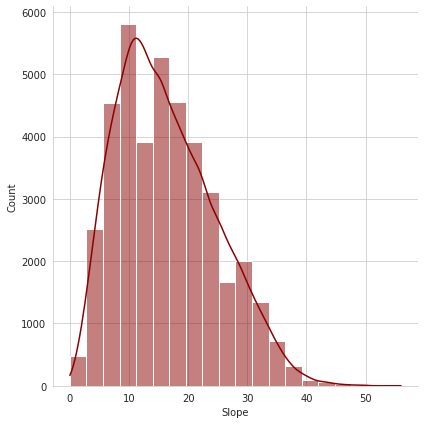

In [ ]:
sns.displot(df['Slope'].dropna(), kde=True,height= 6,color='darkred',bins=20);

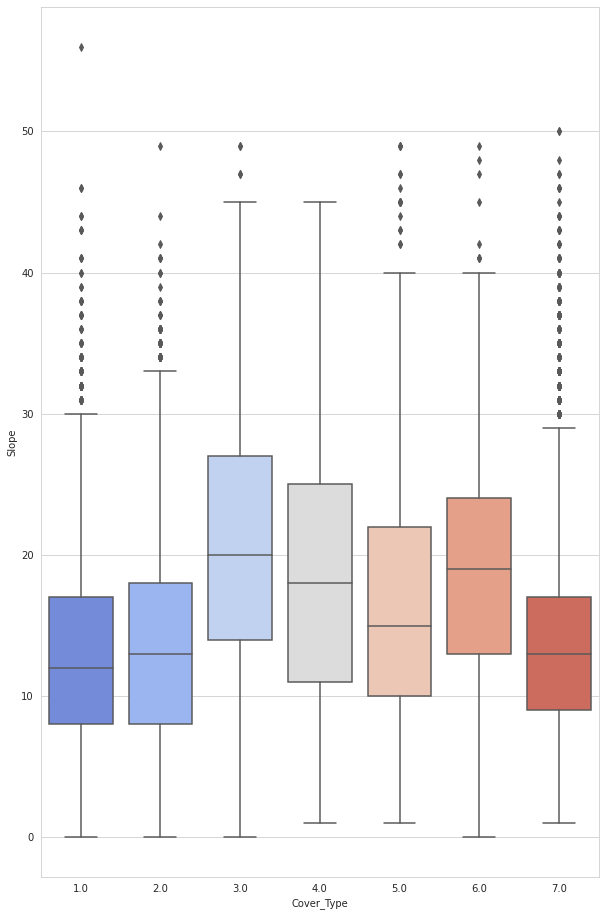

In [ ]:
plt.figure(figsize=(10,16))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette="coolwarm");

# **Horizontal_Distance_To_Roadways - Cover_Type**

In [ ]:
df[["Horizontal_Distance_To_Roadways", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Horizontal_Distance_To_Roadways
0,1.0,2613.820387
1,2.0,2431.832278
2,3.0,929.613844
3,4.0,903.797441
4,5.0,1362.892047
5,6.0,1040.666608
6,7.0,2768.938603


<Figure size 1152x1152 with 0 Axes>

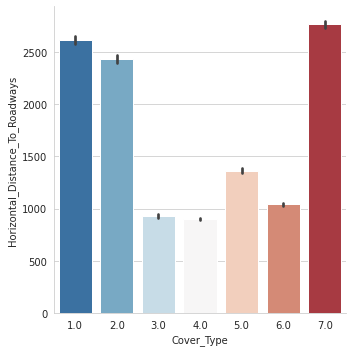

In [ ]:
plt.figure(figsize=(16,16))
sns.factorplot(x="Cover_Type", y ="Horizontal_Distance_To_Roadways", data=df, kind="bar", palette='RdBu_r',size=5);

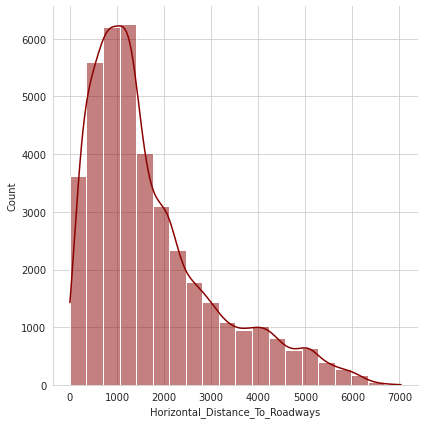

In [ ]:
sns.displot(df['Horizontal_Distance_To_Roadways'].dropna(), kde=True,height= 6,color='darkred',bins=20);

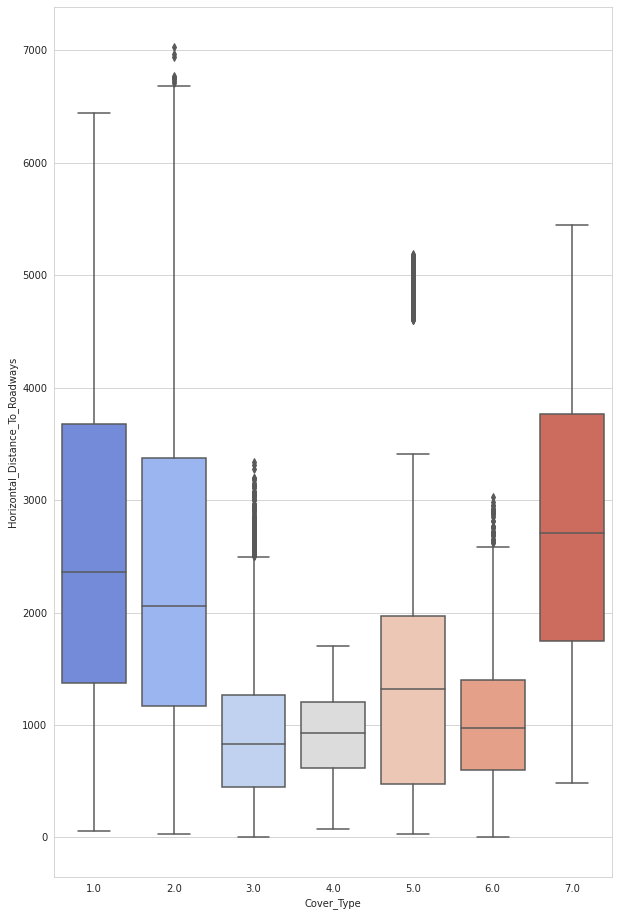

In [ ]:
plt.figure(figsize=(10,16))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data=df, palette="coolwarm");

# **Horizontal_Distance_To_Fire_Points - Cover_Type**

In [ ]:
df[["Horizontal_Distance_To_Fire_Points", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Horizontal_Distance_To_Fire_Points
0,1.0,1999.545167
1,2.0,2176.081123
2,3.0,919.140860
3,4.0,859.025231
4,5.0,1560.658883
5,6.0,1051.396352
6,7.0,2092.773608


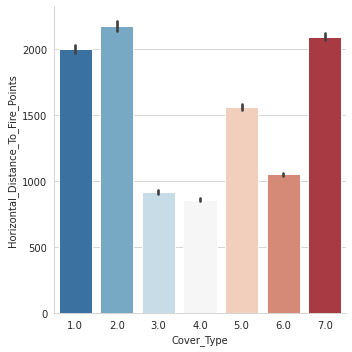

In [ ]:
sns.factorplot(x="Cover_Type", y ="Horizontal_Distance_To_Fire_Points", data=df, kind="bar", palette='RdBu_r',size=5);

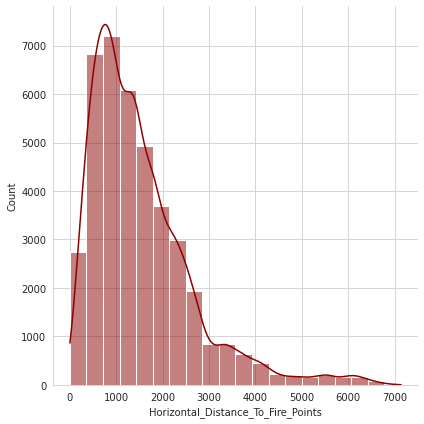

In [ ]:
sns.displot(df['Horizontal_Distance_To_Fire_Points'].dropna(), kde=True,height= 6,color='darkred',bins=20);

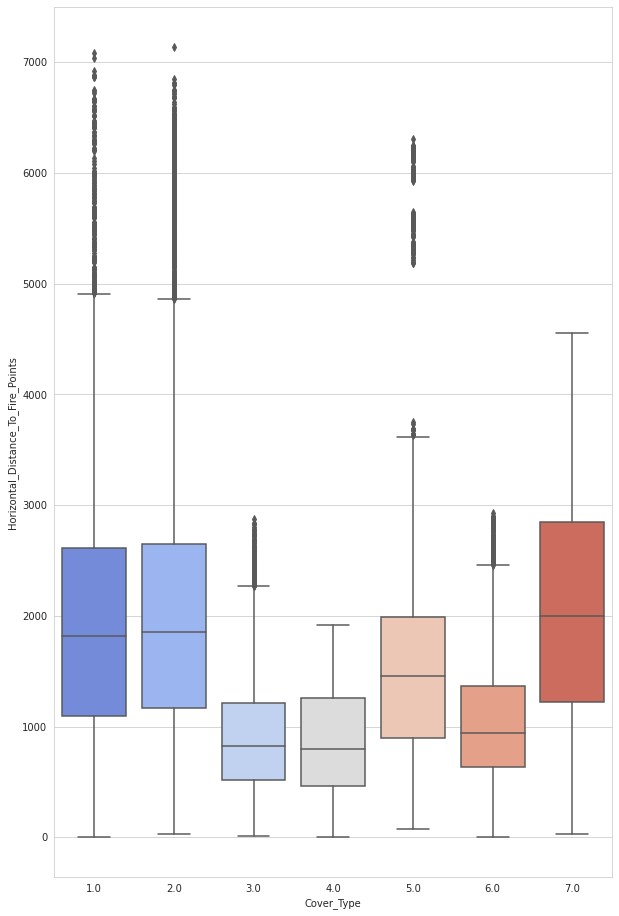

In [ ]:
plt.figure(figsize=(10,16))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data=df, palette="coolwarm");

# **2.  Data Cleaning**

# **Detect Missing Values and Outliers**

#  **i. Missing Value Detection**

In [ ]:
df.isnull().sum()*100/df.shape[0]             # Null percentages of each features

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Cover_Type                            0.0
Soil                                  0.0
Wilderness                            0.0
dtype: float64

#**ii. Outlier Detection**

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [ ]:
df.corr()["Cover_Type"].sort_values(ascending=False)

Cover_Type                            1.000000
Vertical_Distance_To_Hydrology        0.075639
Slope                                 0.073749
Elevation                             0.018712
Horizontal_Distance_To_Hydrology      0.008571
Aspect                                0.006882
Hillshade_9am                        -0.019557
Hillshade_3pm                        -0.052807
Horizontal_Distance_To_Fire_Points   -0.084547
Horizontal_Distance_To_Roadways      -0.098968
Hillshade_Noon                       -0.105087
Name: Cover_Type, dtype: float64

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Soil',
       'Wilderness'],
      dtype='object')

In [ ]:
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil']


In [ ]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = 2.5)
    plt.xlabel("ROOT SQUARE - IQR=2.5")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+0.1), whis = 2.5)
    plt.xlabel("LOGARITMIC - IQR=2.5")
    plt.show()

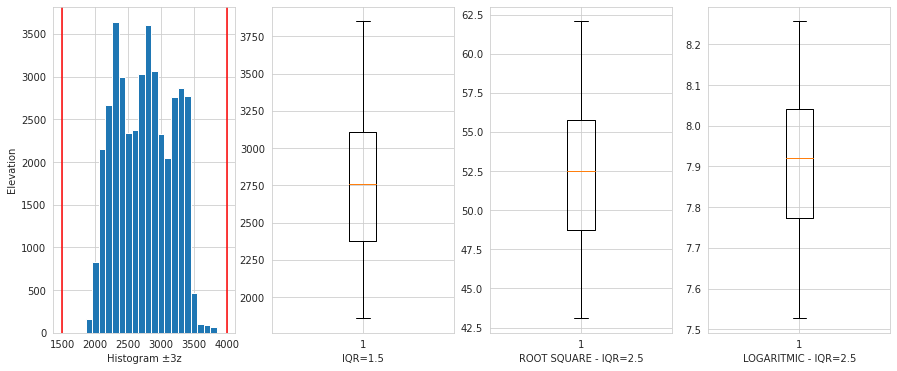

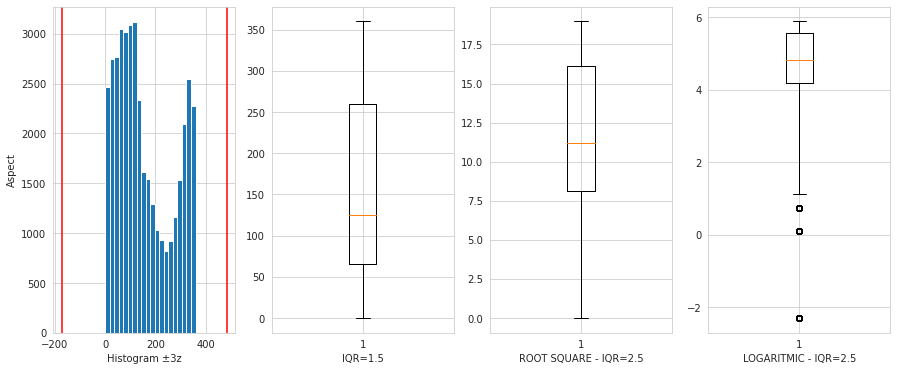

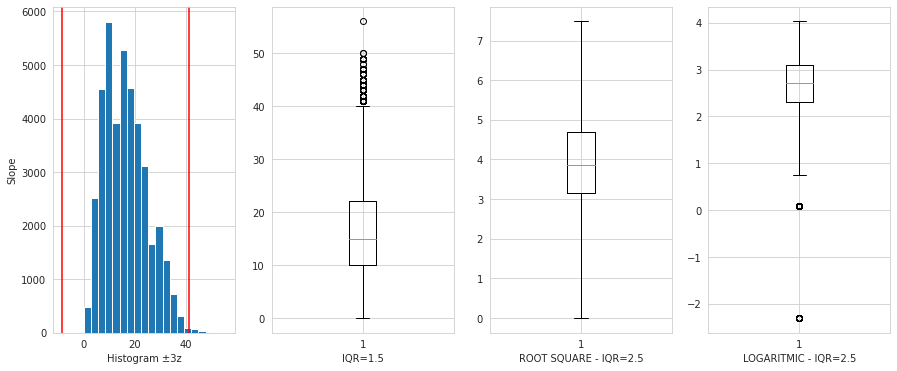

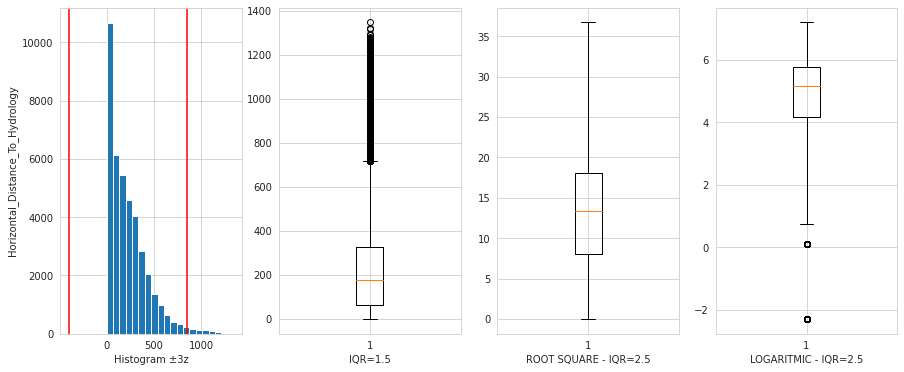

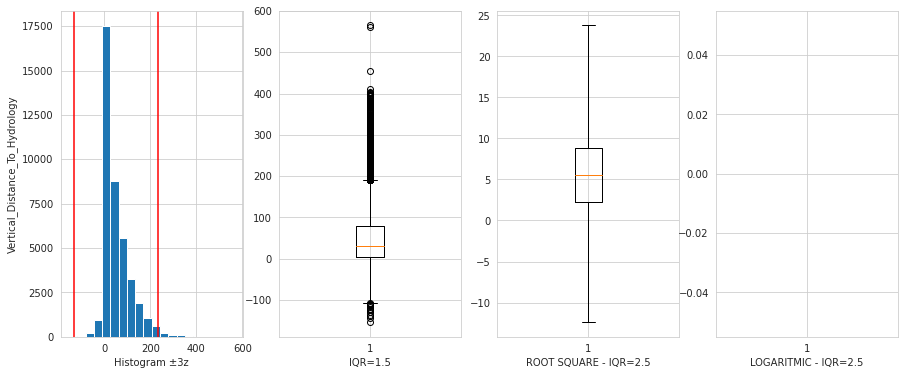

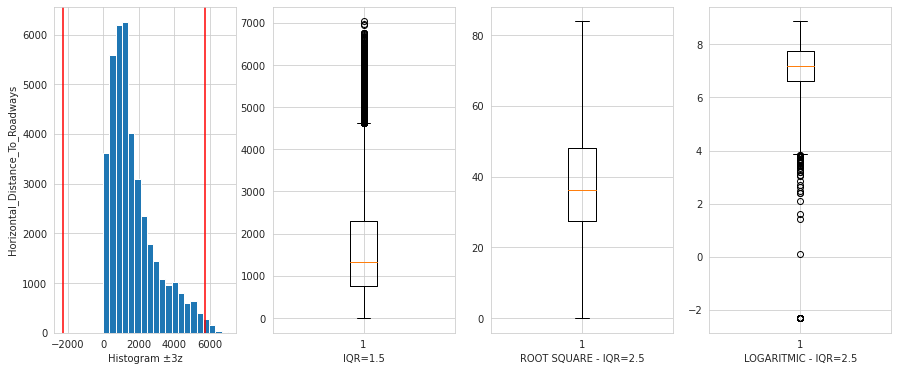

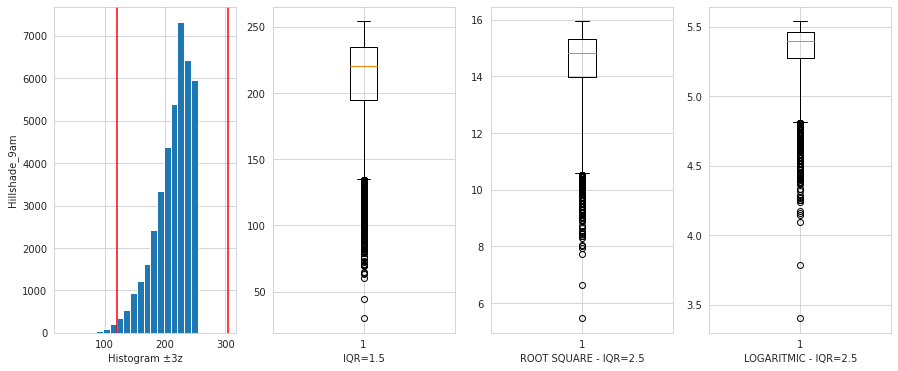

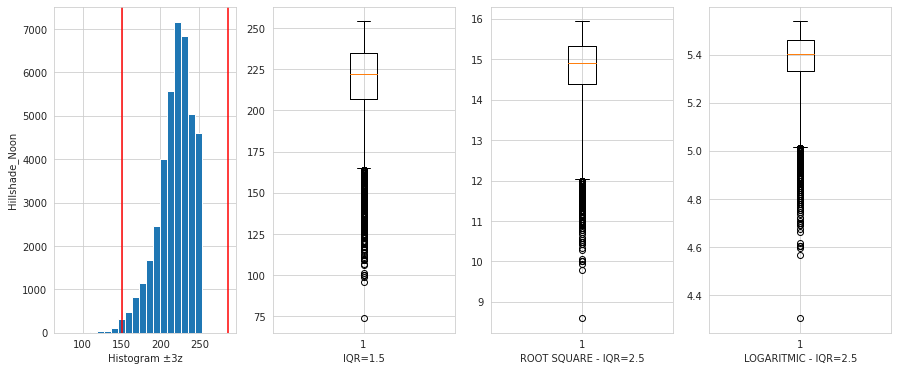

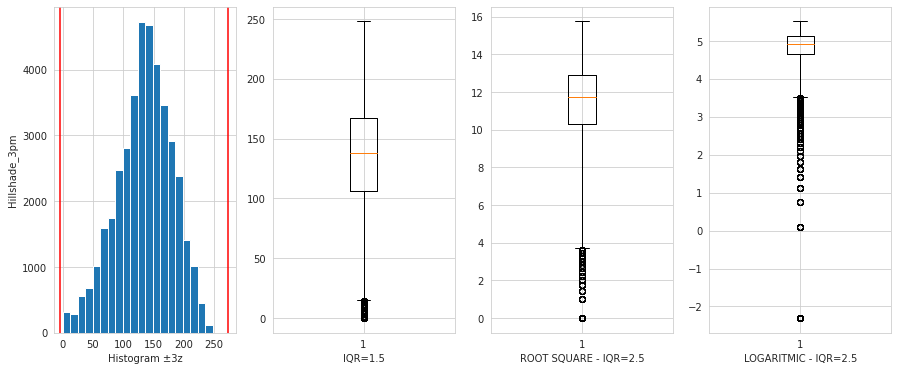

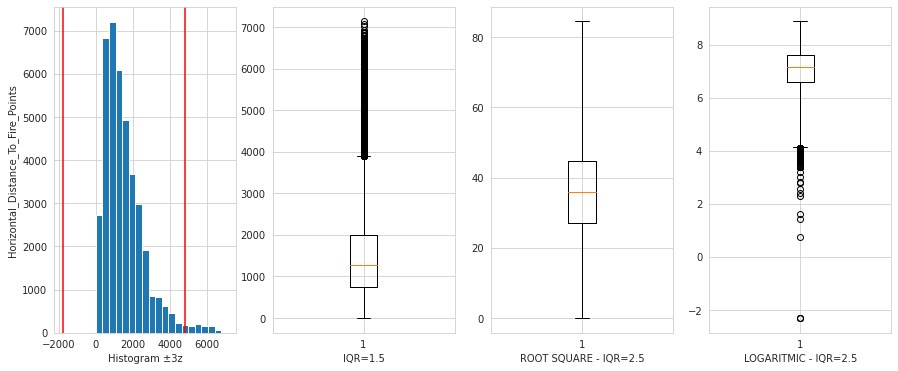

In [ ]:
for i in df.columns[:-3]:
    col_plot(df,i)

In [ ]:
from scipy.stats.mstats import winsorize

def plot_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]+0.1)

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=22)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show()    


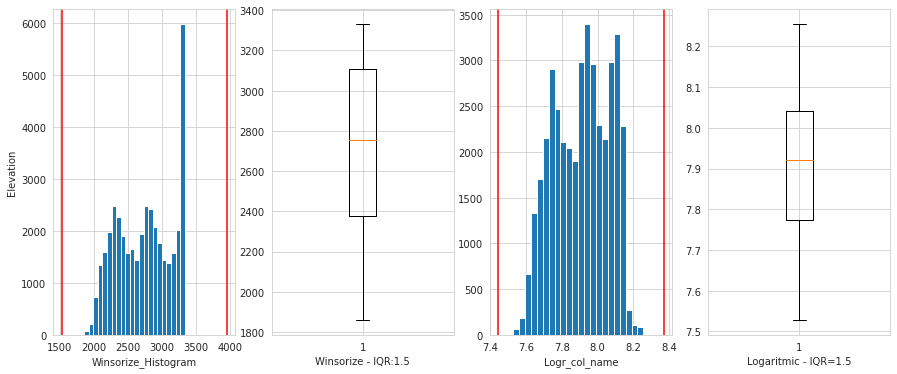

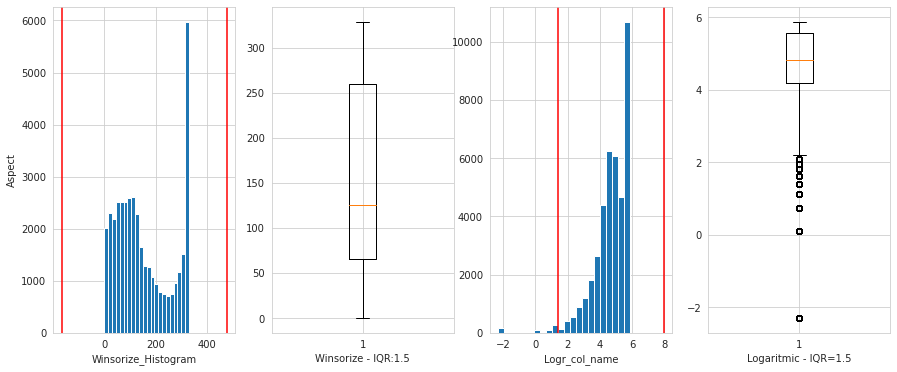

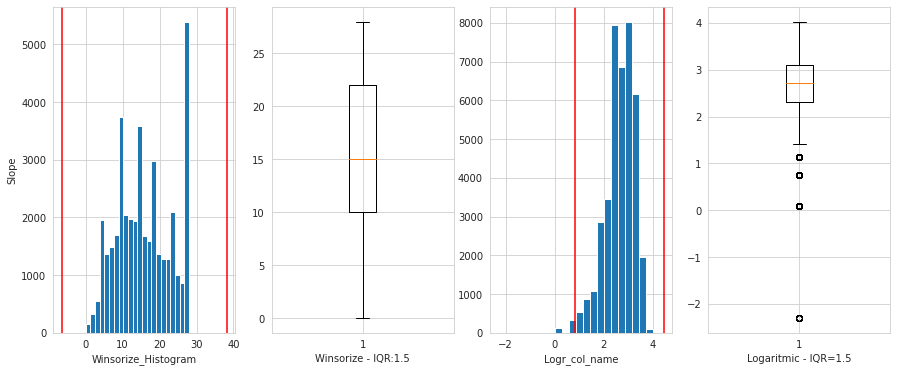

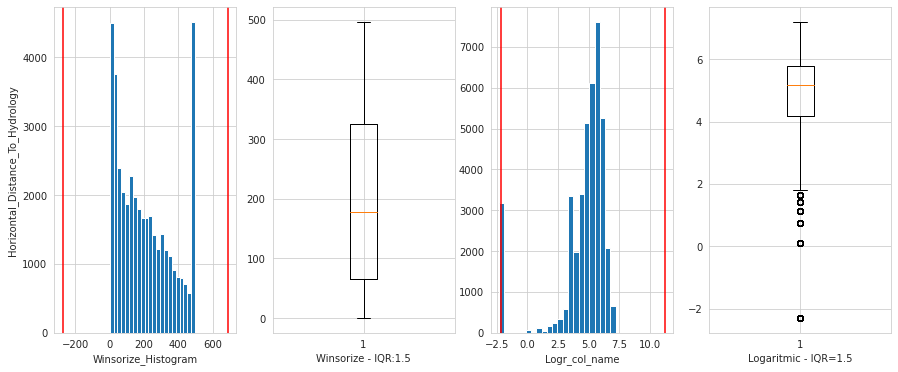

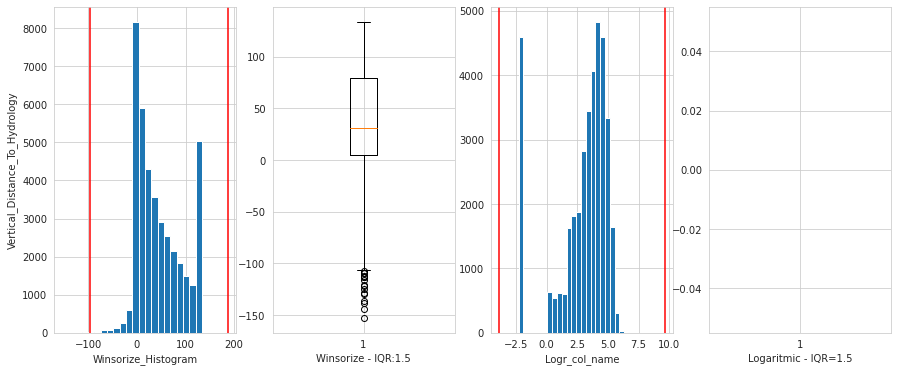

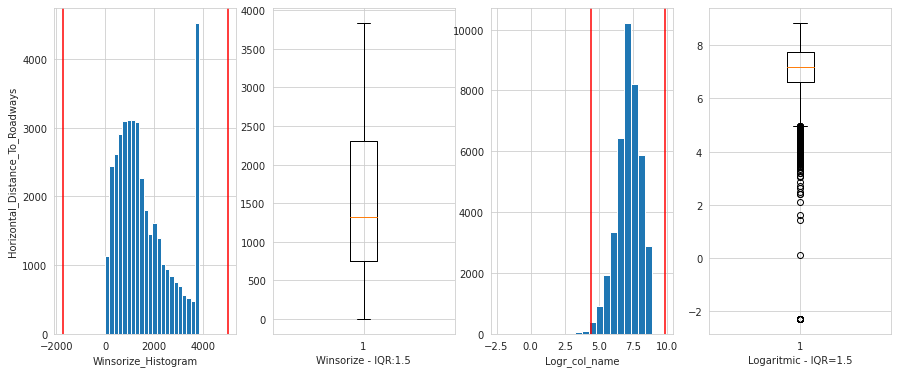

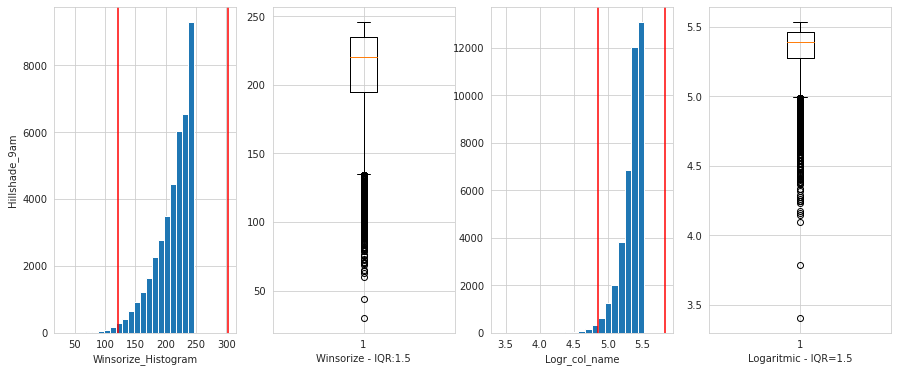

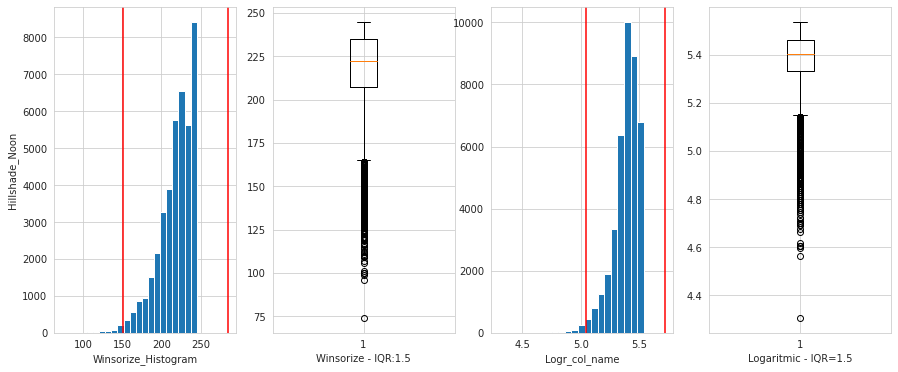

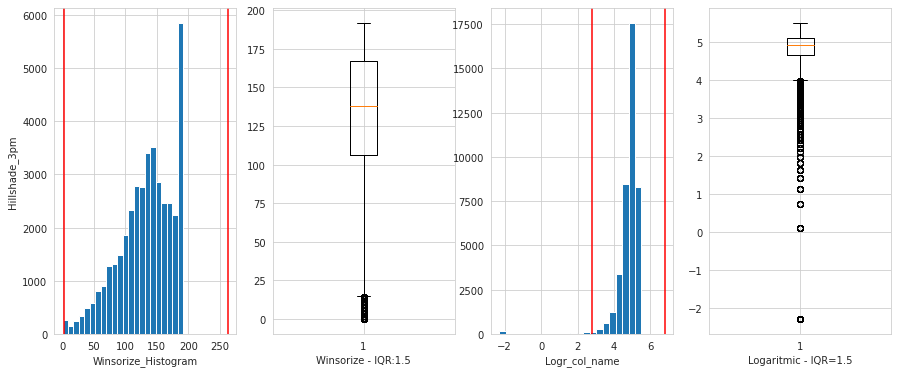

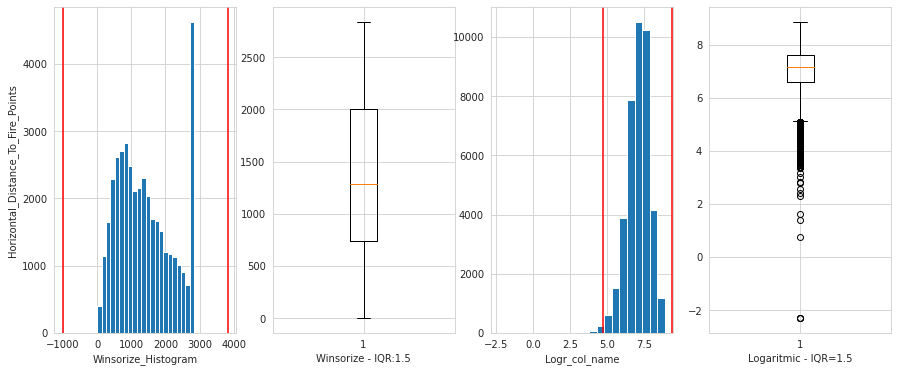

In [ ]:
for i in df.columns[:-3]:
    plot_winsorize(df,i)

In [ ]:
features=['Elevation', 
#            'Aspect', # angle
           'Slope', 
           'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', # not expected normal distribution
#            'Hillshade_9am', # bitwise
#            'Hillshade_Noon',
#            'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points']

In [ ]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0,0.1))

In [ ]:
df_log=df.copy()
for i in features:
    df_log[i]=np.log(df_log[i])

In [ ]:
df_root=df.copy()
f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
for i in features:
    df_root[i]=df_root[i].apply(f)

# **Deal with Outliers**

### Now, let's take a closer look at correlation of continuous columns.

In [ ]:
from numpy import percentile
from scipy.stats import zscore
from scipy import stats

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [ ]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [ ]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
print("Number of Outliers for k*IQR\n")
k=3

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for k*IQR

0 outliers in 'Slope'
151 outliers in 'Horizontal_Distance_To_Hydrology'
161 outliers in 'Vertical_Distance_To_Hydrology'
2 outliers in 'Horizontal_Distance_To_Roadways'
382 outliers in 'Horizontal_Distance_To_Fire_Points'

696 OUTLIERS TOTALLY


In [ ]:
k=2
print(f"Number of Outliers for {k}*IQR after Winsorised\n")

total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Winsorised

2 outliers in 'Vertical_Distance_To_Hydrology'

2 OUTLIERS TOTALLY


In [ ]:
k=3
print(f"Number of Outliers for {k}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_log, col)[2] > 0:
        outliers=detect_outliers(df_log, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 3*IQR after Logarithmed

15 outliers in 'Slope'
3178 outliers in 'Horizontal_Distance_To_Hydrology'
25 outliers in 'Horizontal_Distance_To_Roadways'
30 outliers in 'Horizontal_Distance_To_Fire_Points'

3248 OUTLIERS TOTALLY


In [ ]:
k=2.2
print(f"Number of Outliers for {k}*IQR after Root Square\n")

total=0
for col in features:
    if detect_outliers(df_root, col)[2] > 0:
        outliers=detect_outliers(df_root, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2.2*IQR after Root Square

0 outliers in 'Slope'
0 outliers in 'Horizontal_Distance_To_Hydrology'
2 outliers in 'Vertical_Distance_To_Hydrology'
0 outliers in 'Horizontal_Distance_To_Roadways'
3 outliers in 'Horizontal_Distance_To_Fire_Points'

5 OUTLIERS TOTALLY


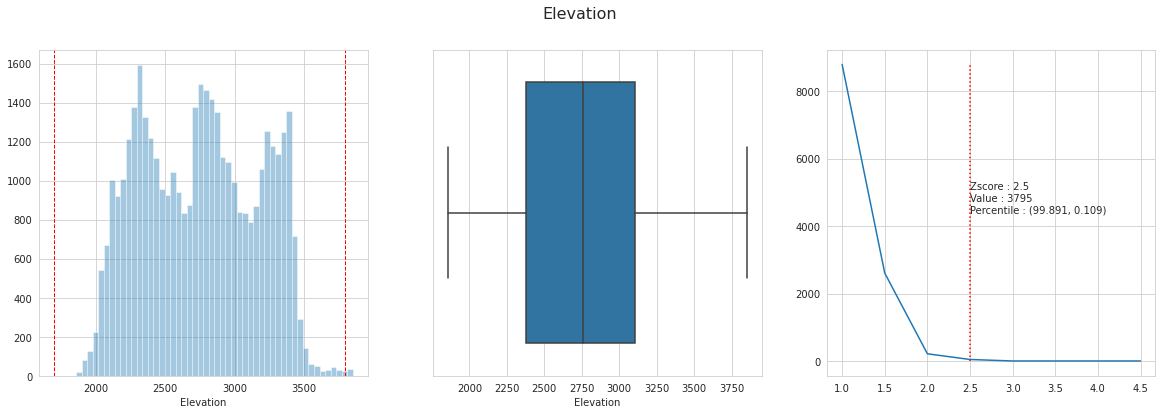

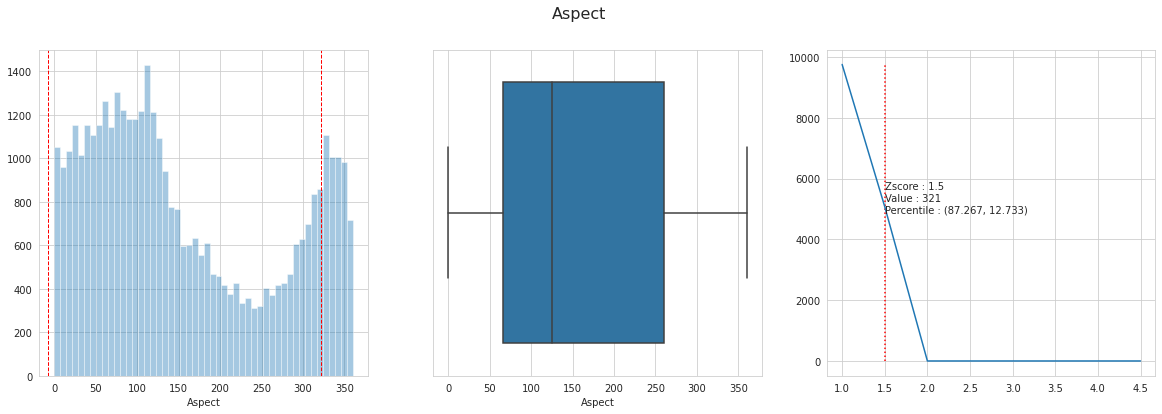

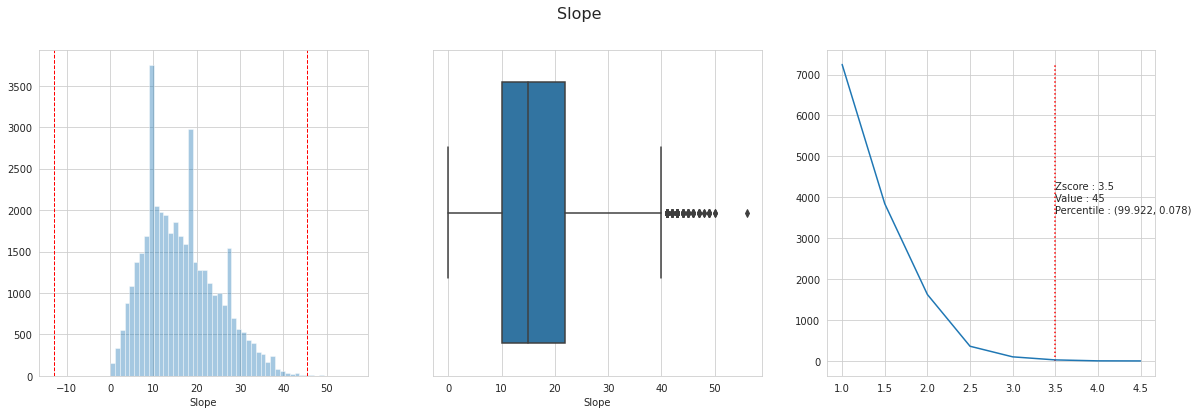

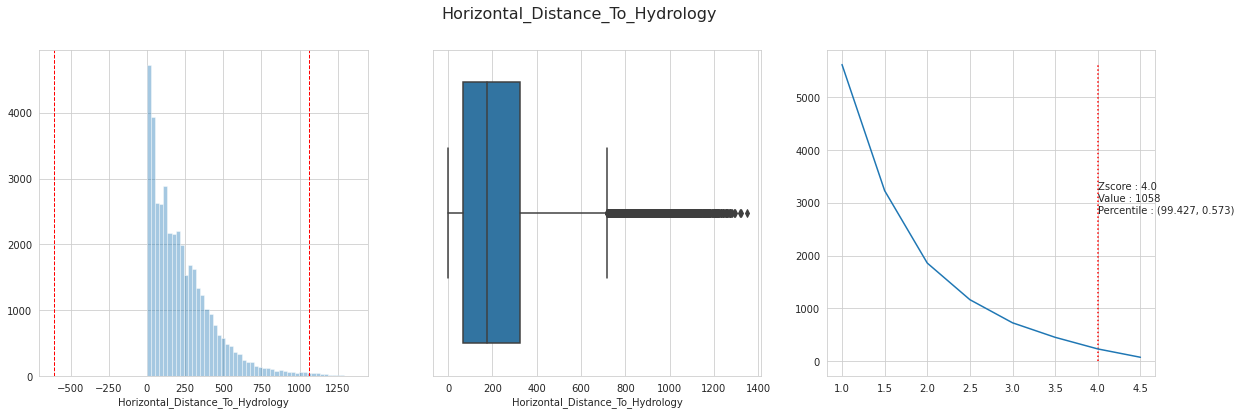

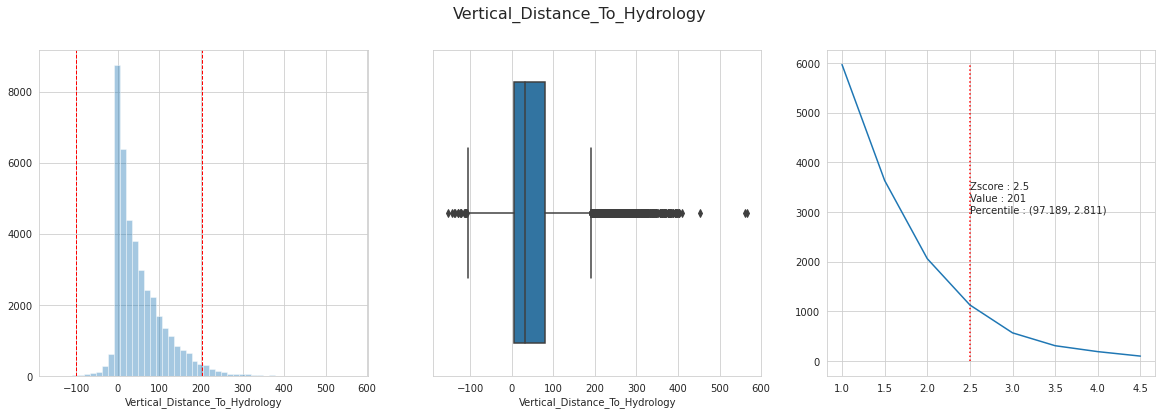

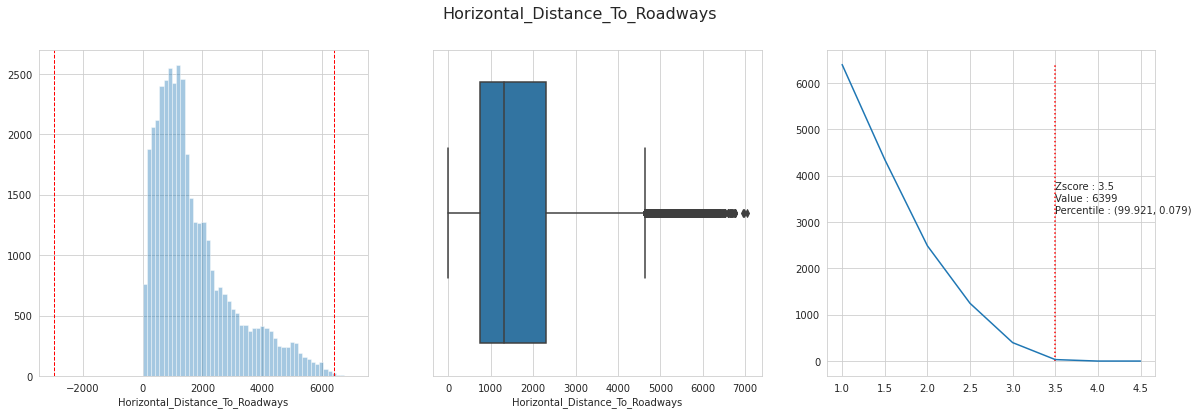

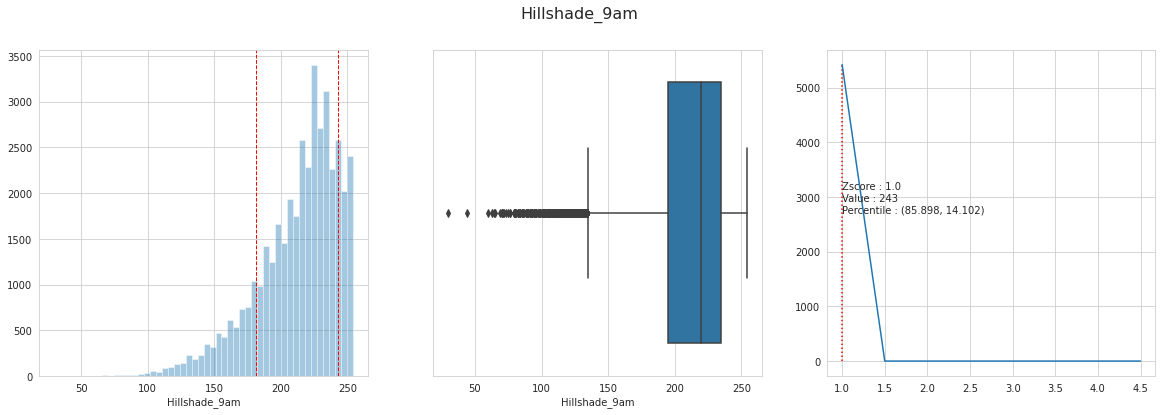

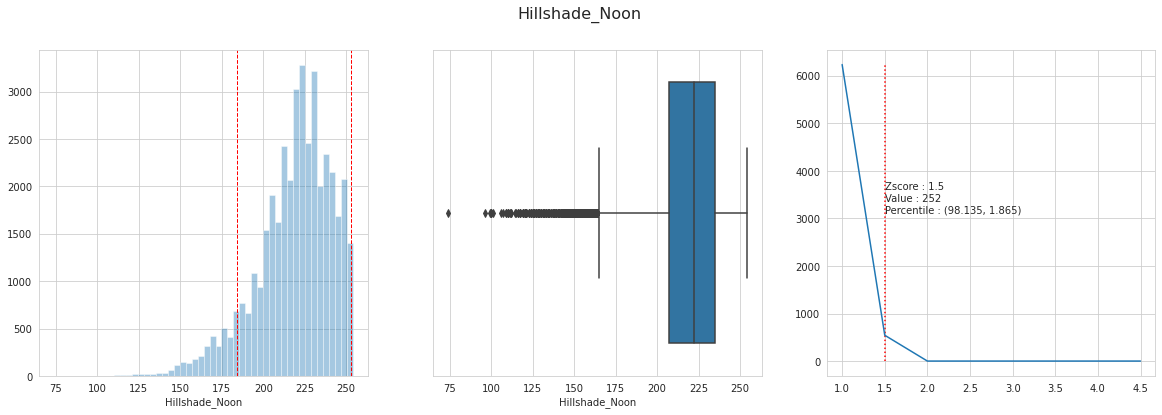

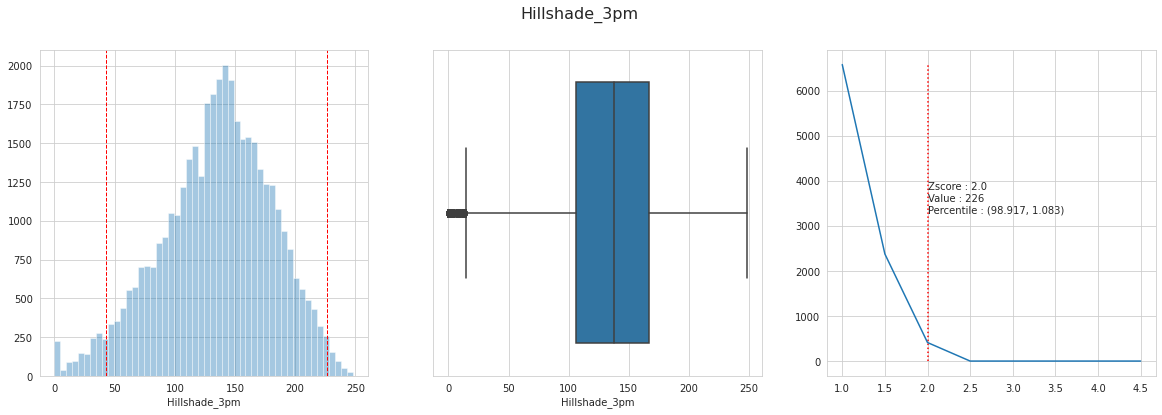

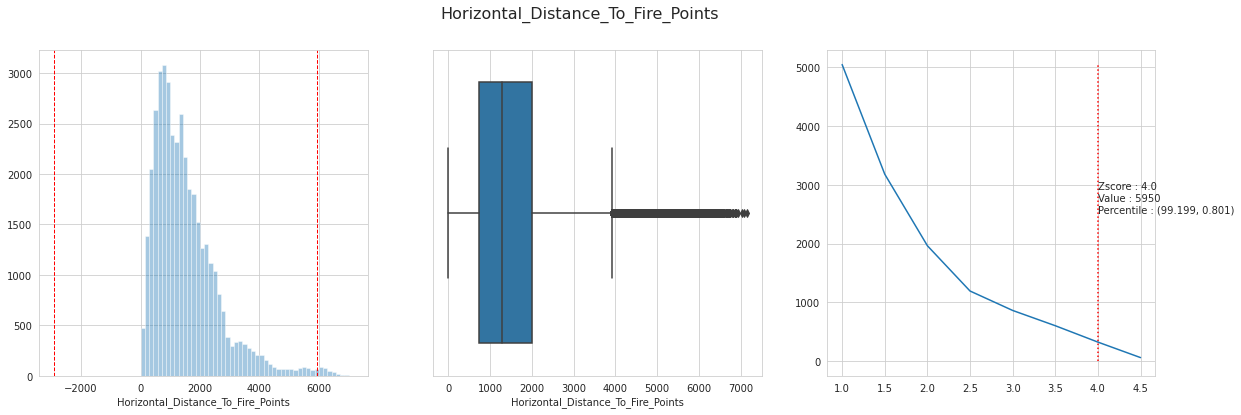

In [ ]:
z_scores=[]
for i in df.columns[:-3]:
    z_scores.append(outlier_inspect(df,i)[2])

In [ ]:
z_scores

[2.5, 1.5, 3.5, 4.0, 2.5, 3.5, 1.0, 1.5, 2.0, 4.0]

In [ ]:
df_z=df.copy()
for i in features:
    down_limit= df_z[i].mean() - z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    upper_limit= df_z[i].mean() + z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    condition= (down_limit < df_z[i]) & (df_z[i] < upper_limit)
    df_z=df_z[condition]

In [ ]:
print('Number of Outliers:',len(df)-len(df_z))

Number of Outliers: 1836


In [ ]:
df_3z=df.copy()
for i in features:
    down_limit= df_3z[i].mean() - (3*df_3z[i].std())
    upper_limit= df_3z[i].mean() + (3*df_3z[i].std())
    condition= (down_limit < df_3z[i]) & (df_3z[i] < upper_limit)
    df_3z=df_3z[condition]

In [ ]:
print('Number of Outliers:',len(df)-len(df_3z))

Number of Outliers: 2608


# **ii. Drop Outliers**

In [ ]:
# We used different outlier detection methods. As a result, we decided to determine outliers with winsorize.

In [ ]:
k=2
for i in features:
    lower,upper,_=detect_outliers(df_winsorised,i,k)
    df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [ ]:
df=df_winsorised
df.shape

(40346, 13)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.Cover_Type.value_counts(dropna=False).sort_index()

1.0    5690
2.0    5841
3.0    5793
4.0    5628
5.0    5910
6.0    5702
7.0    5782
Name: Cover_Type, dtype: int64

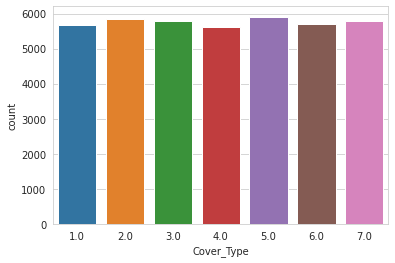

In [ ]:
sns.countplot(x='Cover_Type',data=df);     # Target Label is balanced. 

In [ ]:
def perc_col(df,col):
    print(f'Percentage of df["{col}"] Unique Values:\n')
    for i in sorted(df[col].unique()):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

In [ ]:
perc_col(df,'Cover_Type')   # Target Label is balanced. 

Percentage of df["Cover_Type"] Unique Values:

1.0: %14.10
2.0: %14.48
3.0: %14.36
4.0: %13.95
5.0: %14.65
6.0: %14.13
7.0: %14.33


findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


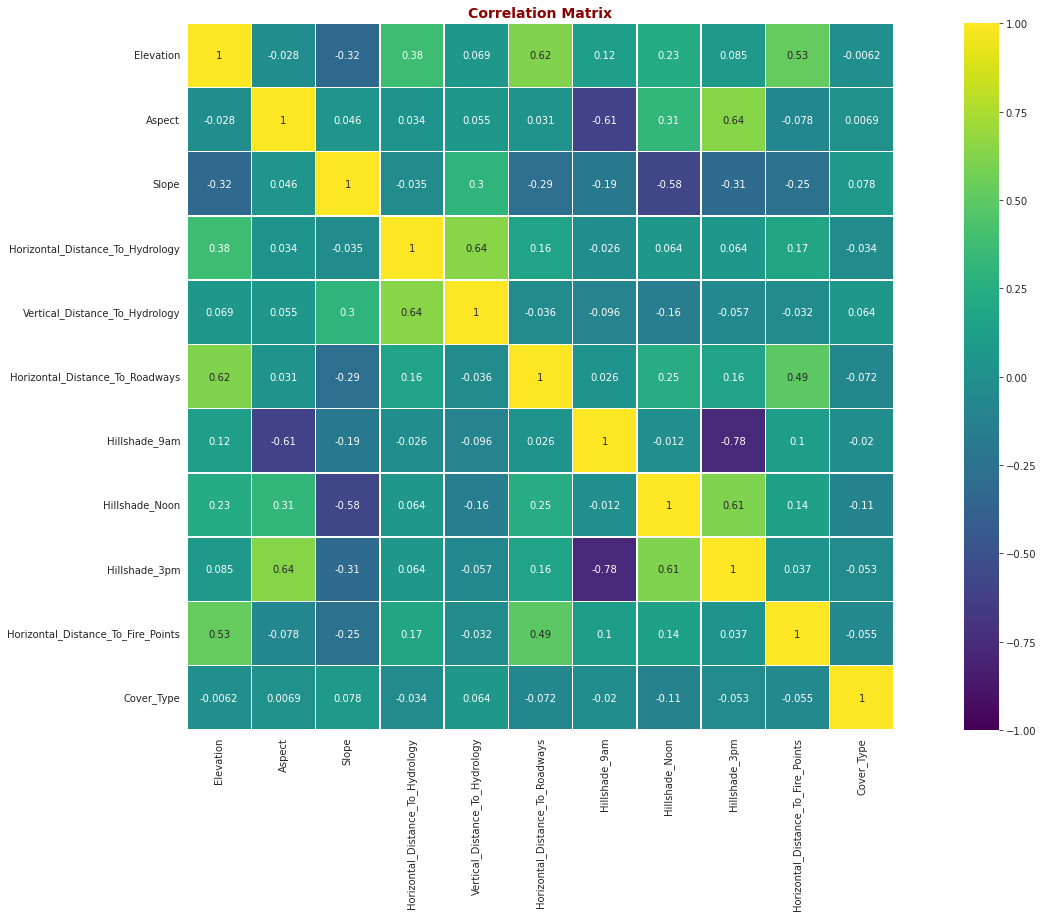

In [ ]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

In [ ]:
df=pd.get_dummies(df)
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_40,Soil_5,Soil_6,Soil_7,Soil_8,Soil_9,Wilderness_1,Wilderness_2,Wilderness_3,Wilderness_4
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,1,0
1,3269,110,19,134,40,3734,249,216,88,2843,...,0,0,0,0,0,0,1,0,0,0
2,3283,322,18,346,104,3840,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,0
3,2847,89,28,270,134,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,1,0
4,3248,93,12,497,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,1,0
5,2855,162,5,85,4,2899,224,241,151,2568,...,0,0,0,0,0,0,1,0,0,0
6,2410,331,21,124,66,423,165,207,177,589,...,0,0,0,0,0,0,0,0,1,0
7,2151,337,28,67,31,784,137,180,172,491,...,0,0,0,0,0,0,0,0,0,1
8,3255,357,19,339,120,3829,185,199,148,2843,...,1,0,0,0,0,0,0,0,1,0
9,2291,32,7,0,0,487,218,224,142,831,...,0,0,0,0,0,0,0,0,0,1


# **3. Feature Engineering**

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [ ]:
Square_Hypo_Distance = df["Horizontal_Distance_To_Hydrology"]*df["Horizontal_Distance_To_Hydrology"]+df["Vertical_Distance_To_Hydrology"]*df["Vertical_Distance_To_Hydrology"]
df["Hypotenuse"]=Square_Hypo_Distance

In [ ]:
df["Average_Elevation_Hydro"] = (df["Elevation"] + df["Vertical_Distance_To_Hydrology"]) /2 

In [ ]:
df["Average_Dist_Road_Hydro"]= (df["Horizontal_Distance_To_Hydrology"] + df["Horizontal_Distance_To_Roadways"])/2

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
       'Cover_Type', 'Soil_1', 'Soil_10', 'Soil_11', 'Soil_12', 'Soil_13',
       'Soil_14', 'Soil_16', 'Soil_17', 'Soil_18', 'Soil_19', 'Soil_2',
       'Soil_20', 'Soil_21', 'Soil_22', 'Soil_23', 'Soil_24', 'Soil_25',
       'Soil_26', 'Soil_27', 'Soil_28', 'Soil_29', 'Soil_3', 'Soil_30',
       'Soil_31', 'Soil_32', 'Soil_33', 'Soil_34', 'Soil_35', 'Soil_36',
       'Soil_37', 'Soil_38', 'Soil_39', 'Soil_4', 'Soil_40', 'Soil_5',
       'Soil_6', 'Soil_7', 'Soil_8', 'Soil_9', 'Wilderness_1', 'Wilderness_2',
       'Wilderness_3', 'Wilderness_4', 'Hypotenuse', 'Average_Elevation_Hydro',
       'Average_Dist_Road_Hydro'],
      dtype='object')

In [ ]:
df.drop(columns=['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Elevation', 'Horizontal_Distance_To_Roadways'], axis=1,  inplace=True)

In [ ]:
df.sample(3)

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_1,Soil_10,Soil_11,Soil_12,...,Soil_7,Soil_8,Soil_9,Wilderness_1,Wilderness_2,Wilderness_3,Wilderness_4,Hypotenuse,Average_Elevation_Hydro,Average_Dist_Road_Hydro
11175,87,12,237,219,930,4.0,1,0,0,0,...,0,0,0,0,0,0,1,466,1061.0,662.0
29885,139,13,239,235,953,3.0,0,0,0,0,...,0,0,0,0,0,1,0,9146,1231.5,218.0
25280,327,9,198,229,90,6.0,0,0,0,0,...,0,0,0,0,0,1,0,32800,1212.5,124.5


In [ ]:
df.to_csv("treetypes_EDA.csv", index = False)

# **4. Prediction (Multi-class Classification)**

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from statsmodels.formula.api import ols
from scipy.stats import zscore
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

# **Data Preprocessing**

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [ ]:
df = pd.read_csv("treetypes_EDA.csv")
df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_1,Soil_10,Soil_11,Soil_12,...,Soil_7,Soil_8,Soil_9,Wilderness_1,Wilderness_2,Wilderness_3,Wilderness_4,Hypotenuse,Average_Elevation_Hydro,Average_Dist_Road_Hydro
0,123,10,237,231,2113,6.0,0,1,0,0,...,0,0,0,0,0,1,0,47248,1372.0,1228.5
1,110,19,249,216,2843,1.0,0,0,0,0,...,0,0,0,1,0,0,0,19556,1654.5,1934.0
2,322,18,170,217,1330,7.0,0,0,0,0,...,0,0,0,1,0,0,0,130532,1693.5,2093.0
3,89,28,248,173,889,5.0,0,0,0,0,...,0,0,0,0,0,1,0,90856,1490.5,795.0
4,93,12,239,221,945,7.0,0,0,0,0,...,0,0,0,0,0,1,0,260933,1683.0,533.5


In [ ]:
df.shape

(40346, 52)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aspect,40346.0,156.654117,109.673321,0.0,66.0,125.0,260.000,360.0
Slope,40346.0,15.872751,7.457576,0.0,10.0,15.0,22.000,28.0
Hillshade_9am,40346.0,212.355872,30.683174,30.0,195.0,220.0,235.000,254.0
Hillshade_Noon,40346.0,218.558296,22.747540,74.0,207.0,222.0,235.000,254.0
Horizontal_Distance_To_Fire_Points,40346.0,1406.865241,806.489178,0.0,740.0,1281.0,2007.000,2843.0
Cover_Type,40346.0,4.002850,1.998405,1.0,2.0,4.0,6.000,7.0
Soil_1,40346.0,0.111312,0.314522,0.0,0.0,0.0,0.000,1.0
Soil_10,40346.0,0.126803,0.332756,0.0,0.0,0.0,0.000,1.0
Soil_11,40346.0,0.023447,0.151321,0.0,0.0,0.0,0.000,1.0
Soil_12,40346.0,0.015342,0.122912,0.0,0.0,0.0,0.000,1.0


In [ ]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# **Implement Support Vector Machine**
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

In [ ]:
# Evaluate the Performance:

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[783 219   0   0  32  11 132]
[234 677  29   1 152  33  17]
[  0  17 699 163  26 227   0]
[   0    0   44 1038    0   40    0]
[ 13 126  38   0 961  32   0]
[  4  25 235 109  24 749   0]
[  62    2    4    0    0    0 1112]
              precision    recall  f1-score   support

         1.0       0.71      0.67      0.69      1177
         2.0       0.64      0.59      0.61      1143
         3.0       0.67      0.62      0.64      1132
         4.0       0.79      0.93      0.85      1122
         5.0       0.80      0.82      0.81      1170
         6.0       0.69      0.65      0.67      1146
         7.0       0.88      0.94      0.91      1180

    accuracy                           0.75      8070
   macro avg       0.74      0.75      0.74      8070
weighted avg       0.74      0.75      0.74      8070



In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

svm_accuracy: 0.7458488228004957 
svm_f1_score: 0.7419433382731688 
svm_recall: 0.7458488228004957


In [ ]:
# Visualization of Confusion Matrix with Table

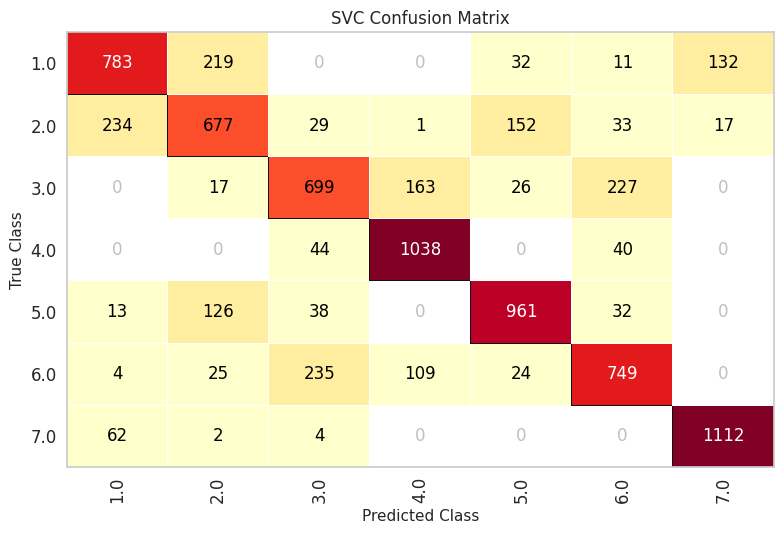

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(svm)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

In [ ]:
# Visualization of Classification Report

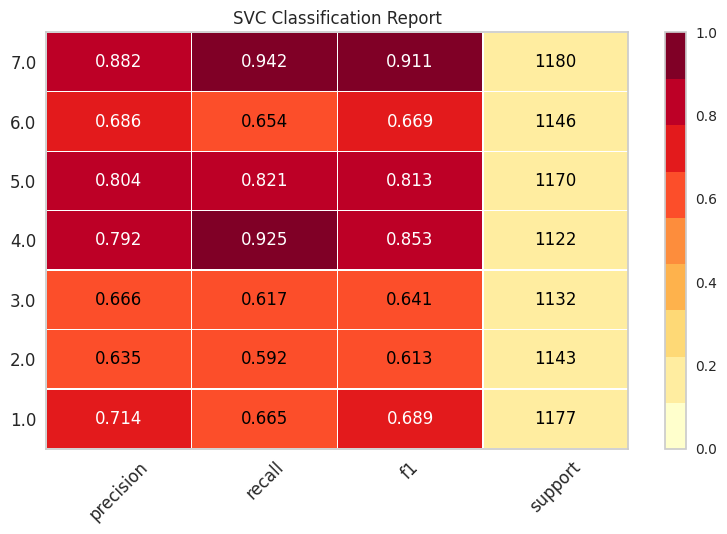

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

**Tunning SVM**

* if C=1, soft margin
* if C=1000, hard margin
* C, margine yakinlik veya uzakligina gore ceza verir.
* Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
* rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
* Gamma buyukse, C onemsiz hale gelir.
* 0.0001 < Gamma < 10  
* 0.1 < C < 100

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1,0.1,0.01,0.001,0.0001], 
#               'kernel': ['rbf']} 

In [ ]:
# grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid_svc.fit(X_train,y_train)
# grid_svc.best_params_

In [ ]:
# y_pred = grid_svc.predict(X_test)
# print(classification_report(y_test, y_pred))

# **Implement Decision Tree Classifier**
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

In [ ]:
# Evaluate the Performance:

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[808 247   0   0  25   3  94]
[237 751  32   0  99  19   5]
[  1  30 918  45   6 132   0]
[   0    0   26 1088    0    8    0]
[  15   37    8    0 1104    6    0]
[  4  28 105  11  10 988   0]
[  47    7    0    0    0    0 1126]
              precision    recall  f1-score   support

         1.0       0.73      0.69      0.71      1177
         2.0       0.68      0.66      0.67      1143
         3.0       0.84      0.81      0.83      1132
         4.0       0.95      0.97      0.96      1122
         5.0       0.89      0.94      0.91      1170
         6.0       0.85      0.86      0.86      1146
         7.0       0.92      0.95      0.94      1180

    accuracy                           0.84      8070
   macro avg       0.84      0.84      0.84      8070
weighted avg       0.84      0.84      0.84      8070



In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
print('dt_accuracy:',dt_accuracy,
      '\ndt_f1_score:',dt_f1_score,
      '\ndt_recall:',dt_recall)

dt_accuracy: 0.912639405204461 
dt_f1_score: 0.9114532129629642 
dt_recall: 0.912639405204461


In [ ]:
# Visualization of Confusion Matrix with Table: 

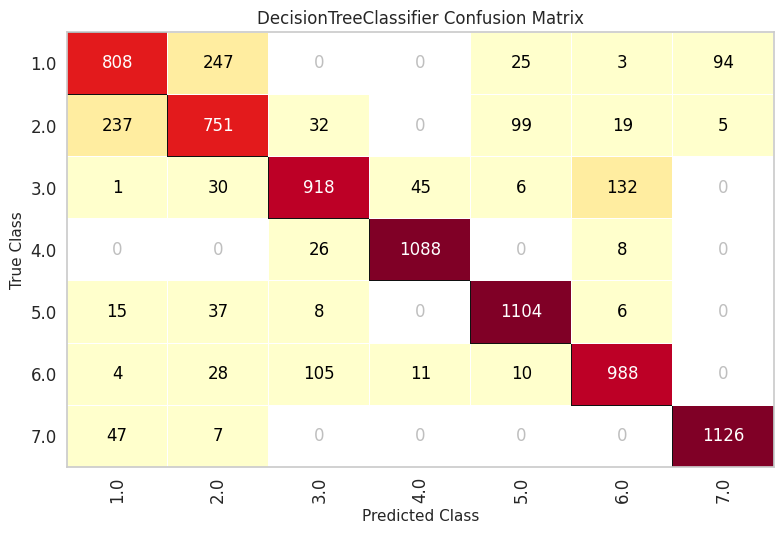

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dt)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

# **Implement Random Forest Classifier**
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
# Evaluate the performance:

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[937 160   0   0  18   2  60]
[148 889  31   0  55  17   3]
[  0   2 981  36   7 106   0]
[   0    0    5 1115    0    2    0]
[   1   18    7    0 1140    4    0]
[   0   11   56   11    3 1065    0]
[  19    2    0    0    0    0 1159]
              precision    recall  f1-score   support

         1.0       0.85      0.80      0.82      1177
         2.0       0.82      0.78      0.80      1143
         3.0       0.91      0.87      0.89      1132
         4.0       0.96      0.99      0.98      1122
         5.0       0.93      0.97      0.95      1170
         6.0       0.89      0.93      0.91      1146
         7.0       0.95      0.98      0.97      1180

    accuracy                           0.90      8070
   macro avg       0.90      0.90      0.90      8070
weighted avg       0.90      0.90      0.90      8070



In [ ]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9028500619578687 
rfc_f1_score: 0.9015141551029028 
rfc_recall: 0.9028500619578687


In [ ]:
# Cross Validation Scores:

In [ ]:
rfc_accuracy = cross_val_score(rfc, X_test, y_test,cv = 10).mean()
rfc_f1_score = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
rfc_recall = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
print('rfc_accuracy:',rfc_accuracy,
       '\nrfc_f1_score:',rfc_f1_score,
       '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.8410161090458489 
rfc_f1_score: 0.8421419029623639 
rfc_recall: 0.839900867410161


In [ ]:
# RF Tunning

In [ ]:
rfc_params = {"n_estimators":[50, 100, 300],
               "max_depth":[3,5,7],
               "max_features": [2,4,6,8],
               "min_samples_split": [2,4,6]}

In [ ]:
rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
rfc_grid.best_params_

In [ ]:
rfc_tuned = RandomForestClassifier(max_depth = 7,             
                                   max_features = 8, 
                                   min_samples_split = 2, 
                                   n_estimators = 1000).fit(X_train, y_train)

In [ ]:
# Visualization of Confusion Matrix with Table

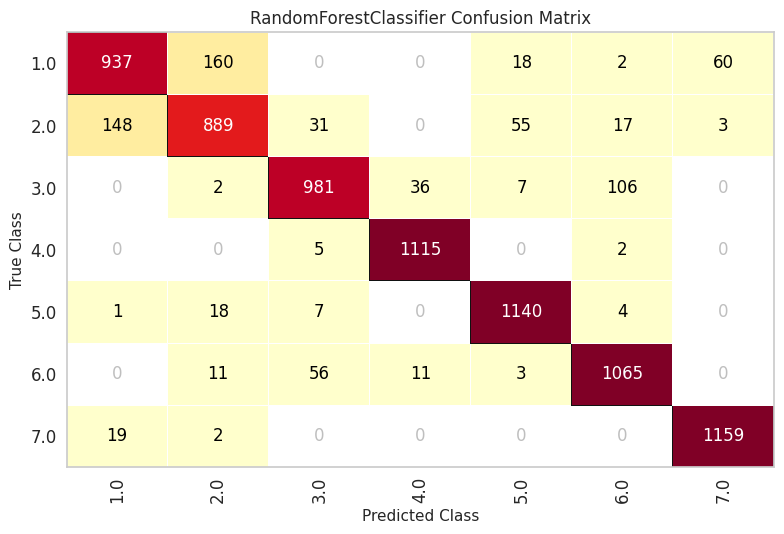

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rfc)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

In [ ]:
# Visualization of Confusion Matrix with Countplot :

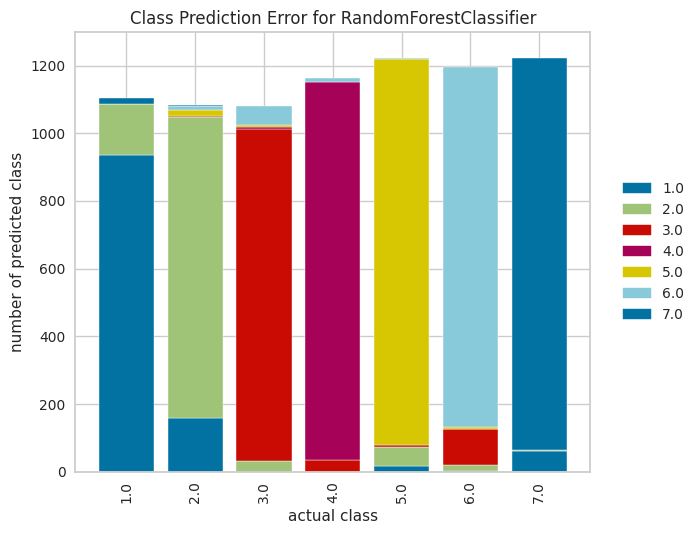

In [ ]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# **Implement XGBoost Classifer**
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
# Evaluate the performance:

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.69      0.61      0.65      1177
         2.0       0.72      0.48      0.58      1143
         3.0       0.67      0.62      0.64      1132
         4.0       0.86      0.95      0.90      1122
         5.0       0.72      0.87      0.79      1170
         6.0       0.68      0.70      0.69      1146
         7.0       0.81      0.94      0.87      1180

    accuracy                           0.74      8070
   macro avg       0.73      0.74      0.73      8070
weighted avg       0.73      0.74      0.73      8070



In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.7397769516728625 
xgb_f1_score: 0.731264103928993 
xgb_recall: 0.7397769516728625


In [ ]:
# Tunning XGBOOST:

In [ ]:
xgb_params = {"n_estimators": [50,300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,9,17],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5, 
#                             n_iter=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# xgb_grid.best_params_

In [ ]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 15, 
                                n_estimators= 200, 
                                subsample= 0.7).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.80      0.82      1177
         2.0       0.83      0.78      0.81      1143
         3.0       0.93      0.89      0.91      1132
         4.0       0.97      1.00      0.98      1122
         5.0       0.95      0.98      0.96      1170
         6.0       0.91      0.95      0.93      1146
         7.0       0.95      0.98      0.97      1180

    accuracy                           0.91      8070
   macro avg       0.91      0.91      0.91      8070
weighted avg       0.91      0.91      0.91      8070



In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

xgb_accuracy: 0.912639405204461 
xgb_f1_score: 0.9114532129629642 
xgb_recall: 0.912639405204461


In [ ]:
# Cross Validation Scores :

In [ ]:
# xgb_accuracy = cross_val_score(xgb_tuned, X_test, y_test,cv = 10).mean()
# xgb_f1_score = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# xgb_recall = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('xgb_accuracy:',xgb_accuracy,
#       '\nxgb_f1_score:',xgb_f1_score,
#       '\nxgb_recall:',xgb_recall)

In [ ]:
# Visualization of Confusion Matrix with Table :

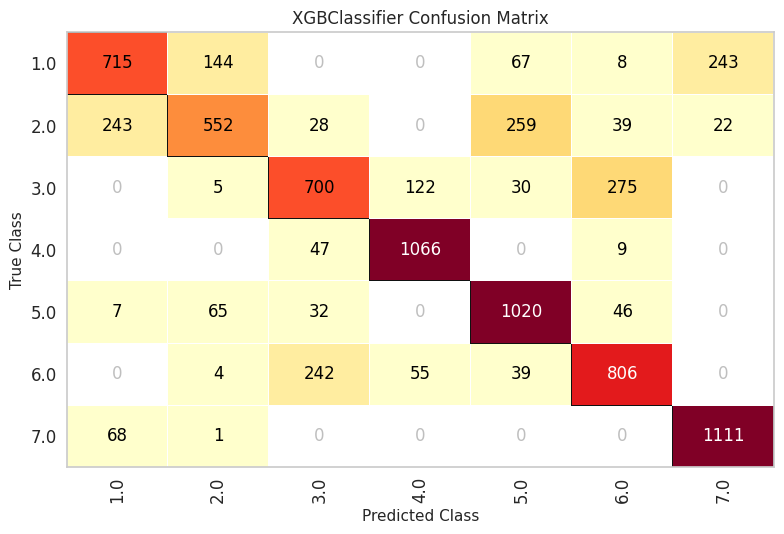

In [ ]:
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split as tts
# from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

In [ ]:
# Visualization of Confusion Matrix with Countplot : 

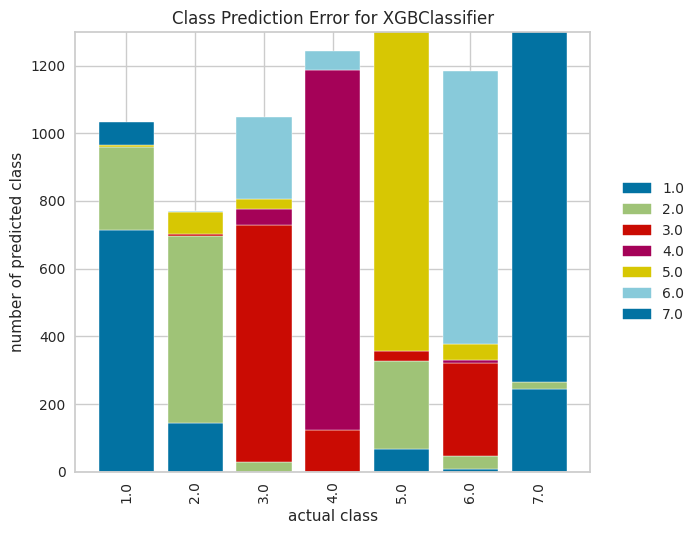

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# **Compare The Models**

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

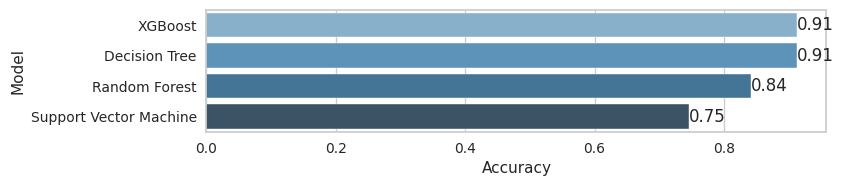

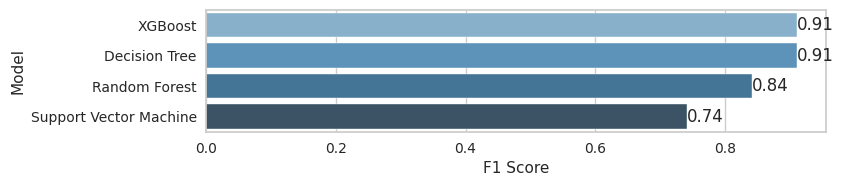

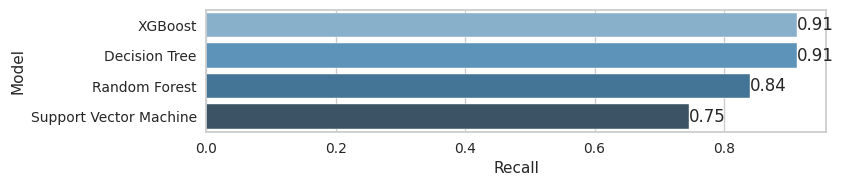

In [ ]:
compare = pd.DataFrame({"Model": ["Random Forest", 
                                  "XGBoost",
#                                   "Logistic Regression",
#                                   'Naive Bayes',
#                                   'Ada Boosting',
                                  'Support Vector Machine', 
                                  "Decision Tree",
                                  
                                 ],
                        "Accuracy": [rfc_accuracy, 
                                     xgb_accuracy, 
#                                      log_accuracy, 
#                                      nb_accuracy,
#                                      ada_accuracy, 
                                     svm_accuracy,
                                     dt_accuracy,
                                     ],
                        "F1 Score": [rfc_f1_score, 
                                     xgb_f1_score, 
#                                      log_f1_score, 
#                                      nb_f1_score, 
#                                      ada_f1_score, 
                                     svm_f1_score, 
                                     dt_f1_score,
                                    
                                    ],
                        "Recall": [rfc_recall, 
                                   xgb_recall, 
#                                    log_recall, 
#                                    nb_recall,
#                                    ada_recall, 
                                   svm_recall,
                                   dt_recall,
                                  
                                  ]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# **Conclusion**
# Finally we trained 4 different Classification models and we got the best F1 Score,Accuracy and Recall of 0.91 for XGBoost and Decision Tree Classifier.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___